# Segmentation of Online Stories

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
import os
import glob
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import copy
%autosave 5

Autosaving every 5 seconds


# I. Sentence number by number of participants saying that sentence is an event boundary
### i. import data_dict

In [5]:
filename = '/Users/alexreblando/Documents/GitHub/data_analysis_ebs/online_experiment/analysis/segment/check'
data_dict = pickle.load( open( filename, "rb" ) )

### ii. import story files

In [6]:
directory_stories = '/Users/alexreblando/Documents/GitHub/ebs/behavioral_August2019/story_xlsx_files_RECORDED'

filenames_stories = glob.glob(directory_stories + '/*.xlsx')

dfs_stories = []
    
for filename in filenames_stories:
    dfs_stories.append(pd.read_excel(filename))

## A. Grouping keypresses into respective stories and priming type

In [7]:
loc_keys_r = dict()
soc_keys_r = dict()
none_keys_r = dict()
all_keys_r = dict()

for key in data_dict:
    this_story = data_dict[key]['story'].iloc[0]
    keys = data_dict[key]['story_presses']
    p_type = data_dict[key]['p_type'].iloc[0]
    #print out the filenames and prolific ids of people who did not press "9" once
    occurrences = np.count_nonzero(keys == 9)
    if occurrences == 0:
        print(key)
        print(data_dict[key]['prolific_id'].iloc[0])
    #put all story keys in the same dictionary regardless of priming
    if this_story in all_keys_r:
        all_keys_r[this_story] = np.concatenate((all_keys_r[this_story],keys[:,np.newaxis]), axis=1)
    else:
        all_keys_r[this_story] = keys[:, np.newaxis]
    #organize keys by priming type
    #no prime
    if p_type == 0:
        if this_story in none_keys_r:
            none_keys_r[this_story] = np.concatenate((none_keys_r[this_story],keys[:,np.newaxis]), axis=1)
        else:
            none_keys_r[this_story] = keys[:, np.newaxis]
    #loc prime
    elif p_type == 1:
        if this_story in loc_keys_r:
            loc_keys_r[this_story] = np.concatenate((loc_keys_r[this_story],keys[:,np.newaxis]), axis=1)
        else:
            loc_keys_r[this_story] = keys[:, np.newaxis]
    #soc prime
    elif p_type == 2:
        if this_story in soc_keys_r:
            soc_keys_r[this_story] = np.concatenate((soc_keys_r[this_story],keys[:,np.newaxis]), axis=1)
        else:
            soc_keys_r[this_story] = keys[:, np.newaxis]

### i. Finding the number of participants in each category for each story
#### -output sums[story] = [total # of participants, loc primed, soc primed, no prime]

In [8]:
sums = {}

for key in all_keys_r:
    this_sum = []
    x, y = all_keys_r[key].shape
    this_sum.append(y)
    if key in loc_keys_r:
        x, y = loc_keys_r[key].shape
        this_sum.append(y)
    else:
        this_sum.append(0)
        pass
    if key in soc_keys_r:
        x, y = soc_keys_r[key].shape
        this_sum.append(y)
    else:
        this_sum.append(0)
    if key in none_keys_r:
        x, y = none_keys_r[key].shape
        this_sum.append(y)
    else:
        this_sum.append(0)
    sums[key] = this_sum

## B. Convert keypresses from '9's and '1's to '1's and '0's

In [9]:
loc_keys = dict()
soc_keys = dict()
none_keys = dict()
all_keys = dict()

#all keys
for key in all_keys_r:
    this_array = copy.deepcopy(all_keys_r[key])
    this_array[this_array ==1] = 0
    this_array[this_array == 9] = 1
    all_keys[key] = this_array   
    
#none keys
for key in none_keys_r:
    this_array = copy.deepcopy(none_keys_r[key])
    this_array[this_array ==1] = 0
    this_array[this_array == 9] = 1
    none_keys[key] = this_array   
    
#loc keys
for key in loc_keys_r:
    this_array = copy.deepcopy(loc_keys_r[key])
    this_array[this_array ==1] = 0
    this_array[this_array == 9] = 1
    loc_keys[key] = this_array   
    
#soc keys
for key in soc_keys_r:
    this_array = copy.deepcopy(soc_keys_r[key])
    this_array[this_array ==1] = 0
    this_array[this_array == 9] = 1
    soc_keys[key] = this_array   

## C. Create Dictionaries with the Sum of Participants' segmentations for each sentence and Percentage of Participants who segmented that sentence

In [10]:
loc_keys_s = dict()
soc_keys_s = dict()
none_keys_s = dict()
all_keys_s = dict()

keys_dicts = [loc_keys, soc_keys, none_keys, all_keys]
sum_dicts = [loc_keys_s, soc_keys_s, none_keys_s, all_keys_s]

for i in range(4):
    for key in keys_dicts[i]:
        this_sum = np.sum(keys_dicts[i][key], axis = 1)
        N = np.size(keys_dicts[i][key],1)
        this_percent = this_sum/N
        this_add = np.column_stack((this_sum, this_percent))
        sum_dicts[i][key] = this_add[:, np.newaxis]
        #squeeze the entry
        sum_dicts[i][key] = np.squeeze(sum_dicts[i][key], axis=(1,))

In [12]:
loc_keys_s

{23: array([[5.        , 0.83333333],
        [3.        , 0.5       ],
        [0.        , 0.        ],
        [2.        , 0.33333333],
        [3.        , 0.5       ],
        [2.        , 0.33333333],
        [3.        , 0.5       ],
        [0.        , 0.        ],
        [2.        , 0.33333333],
        [0.        , 0.        ],
        [4.        , 0.66666667],
        [1.        , 0.16666667],
        [1.        , 0.16666667],
        [3.        , 0.5       ],
        [0.        , 0.        ],
        [4.        , 0.66666667],
        [1.        , 0.16666667],
        [1.        , 0.16666667],
        [2.        , 0.33333333],
        [1.        , 0.16666667],
        [1.        , 0.16666667],
        [0.        , 0.        ],
        [2.        , 0.33333333],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [2.        , 0.33333333],
        [0.        , 0.        ],
        [3.        , 0.5       ],
        [1.        , 0.16666667],
        [1

## D. Organize Putative Event Boundaries

In [7]:
#mark the boundaries with a '1'
#output: story_boundaries, where the first column has the location boundaries and the second column has the social
#boundaries

story_boundaries = dict()

#read in the location and social event values from the story files 
for s in range(16):
    this_story = int(dfs_stories[s]['story'].iloc[0])
    keys2 = dfs_stories[s]['locationEvent'].values
    keys3 = dfs_stories[s]['socialEvent'].values
    story_boundaries[this_story] = keys2[:, np.newaxis]
    story_boundaries[this_story] = np.concatenate((story_boundaries[this_story], keys3[:, np.newaxis]), axis = 1)
    
#mark the changes or boundaries from one event to another with a '1' and delete first two columns
for key in story_boundaries:
    location = story_boundaries[key][:,0]
    social = story_boundaries[key][:,1]
    for i in range(0, len(location)):  
        if location[i] > location[i-1]:
            location[i] = 7
    for i in range(0, len(location)):  
        if location[i] != 7:
            location[i] = 0
    for i in range(0, len(social)):
        if social[i] > social[i - 1]:
            social[i] = 7
    for i in range(0, len(social)):
        if social[i] != 7:
            social[i] = 0
    location[0] = 7
    social[0] = 7
    location2 = location > 1
    social2 = social > 1
    location2 = location2.astype(int)
    social2 = social2.astype(int)
    story_boundaries[key] = np.concatenate((story_boundaries[key], location2[:, np.newaxis]), axis = 1) 
    story_boundaries[key] = np.concatenate((story_boundaries[key], social2[:, np.newaxis]), axis = 1)
    story_boundaries[key] = np.delete(story_boundaries[key] ,np.s_[0:2],axis=1)

## E. Plot the sum of the segmentation of all participants without discriminating between priming

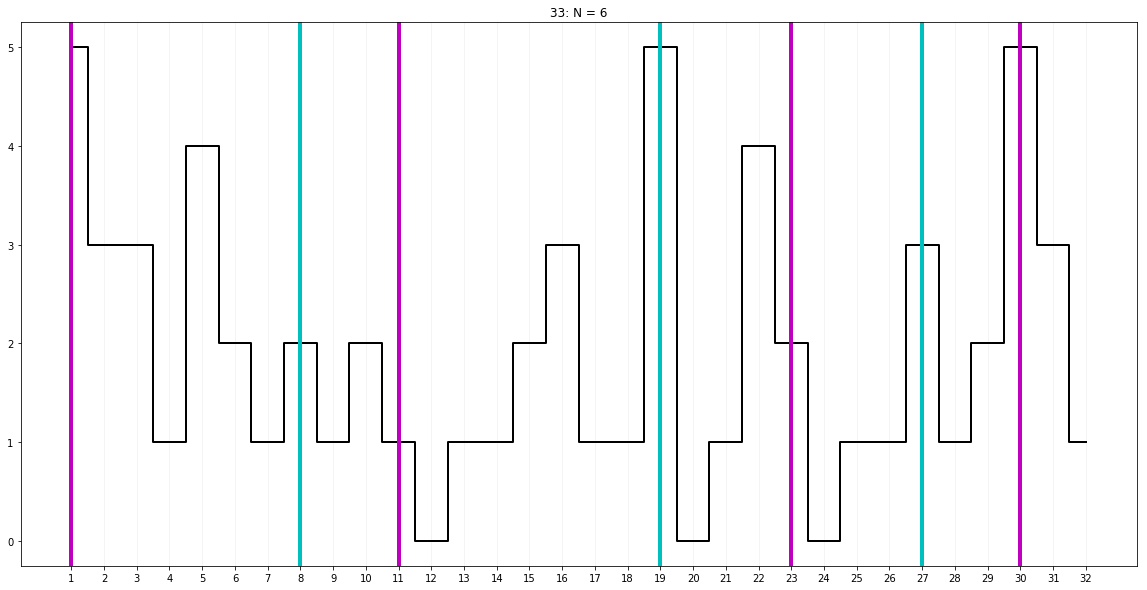

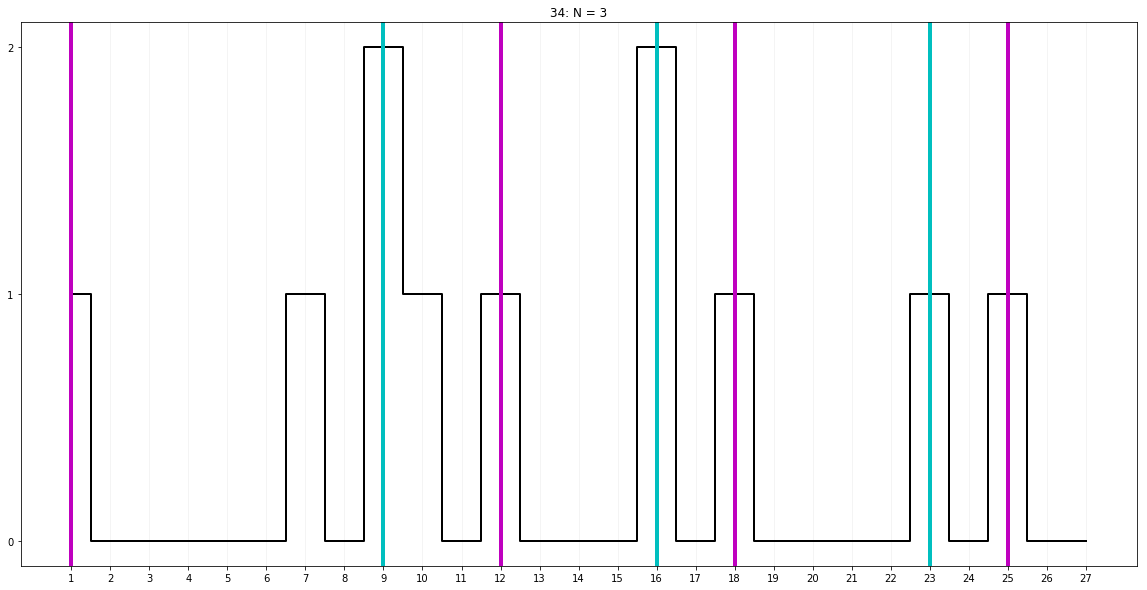

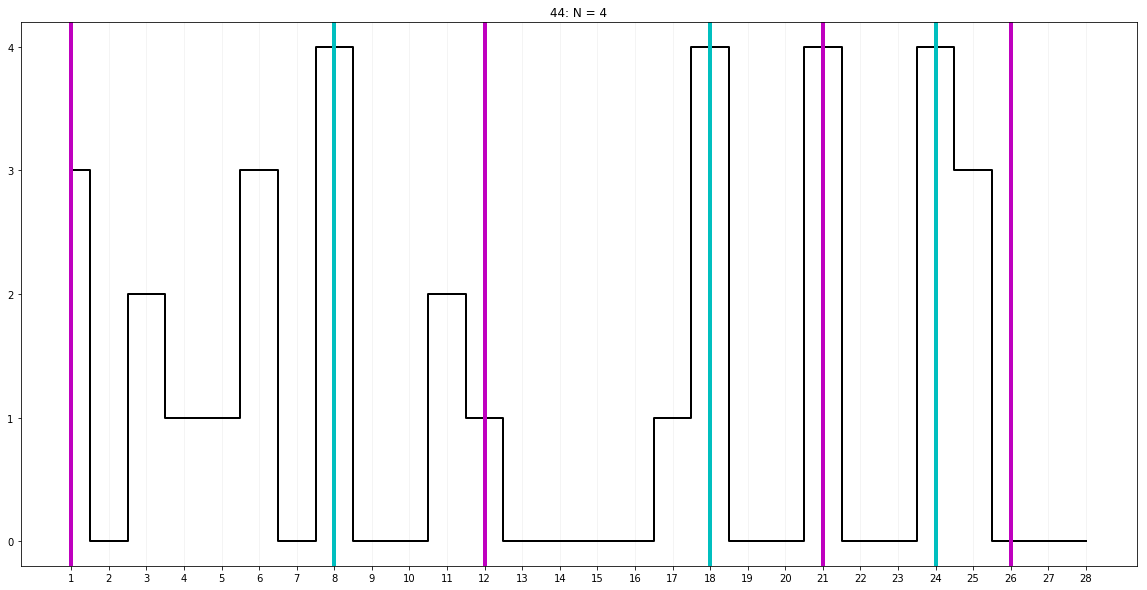

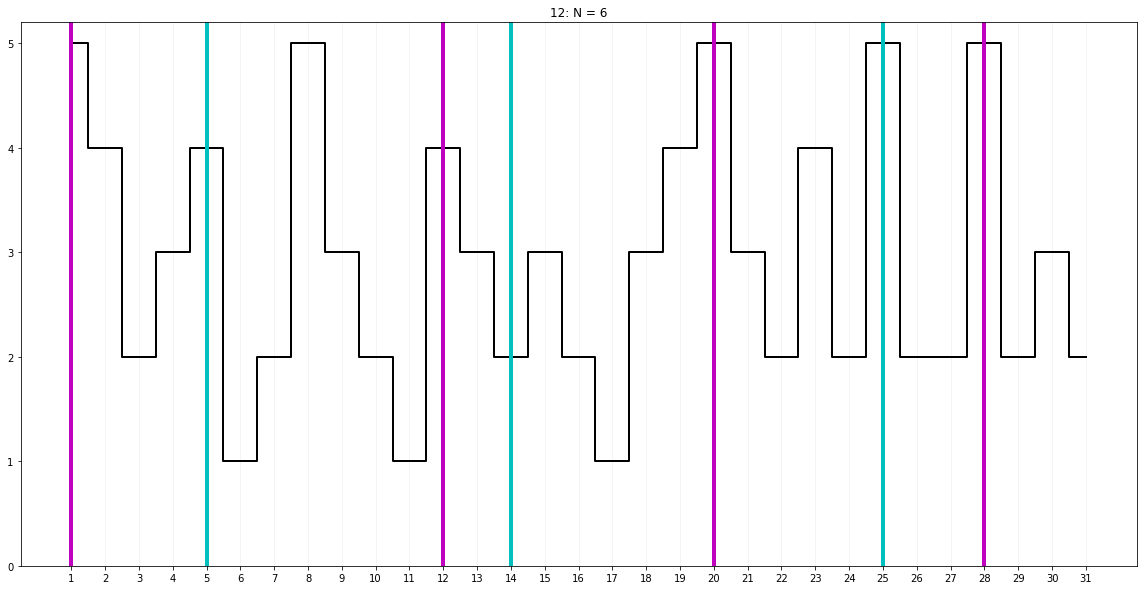

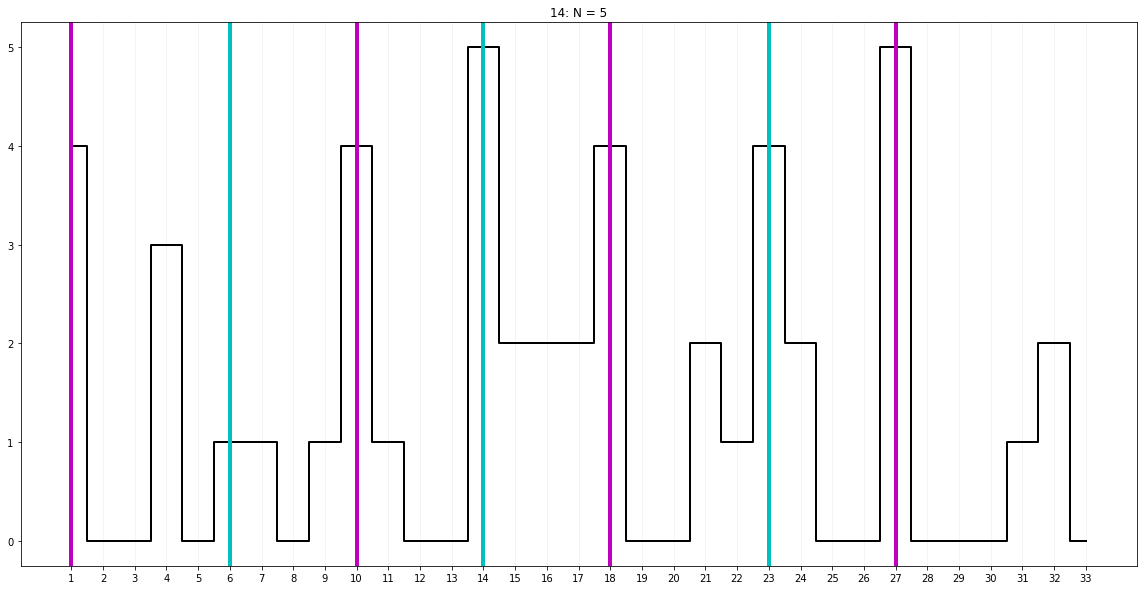

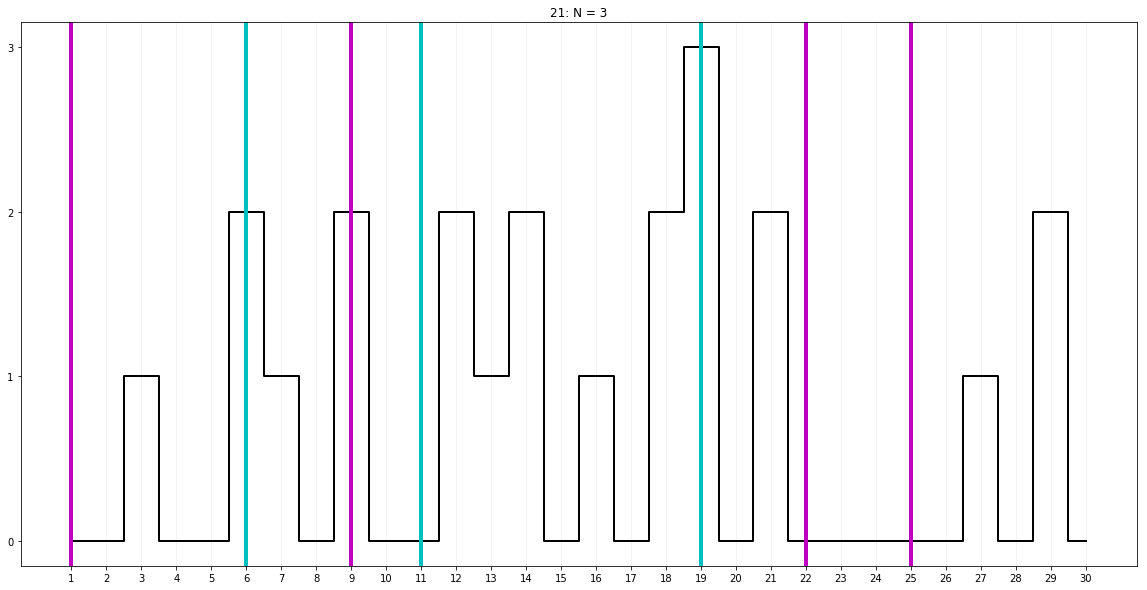

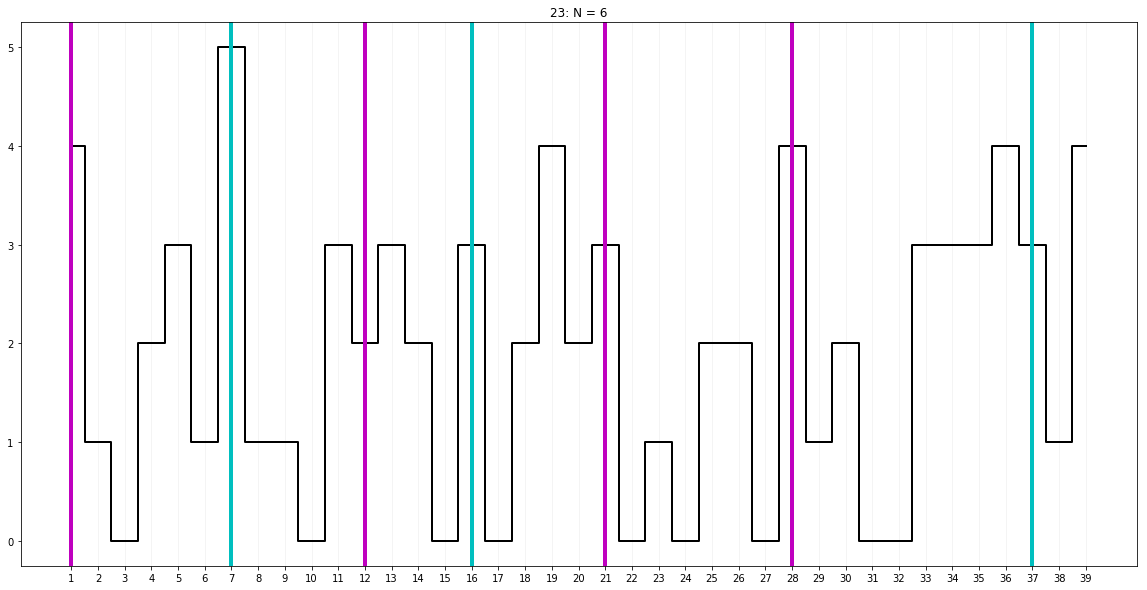

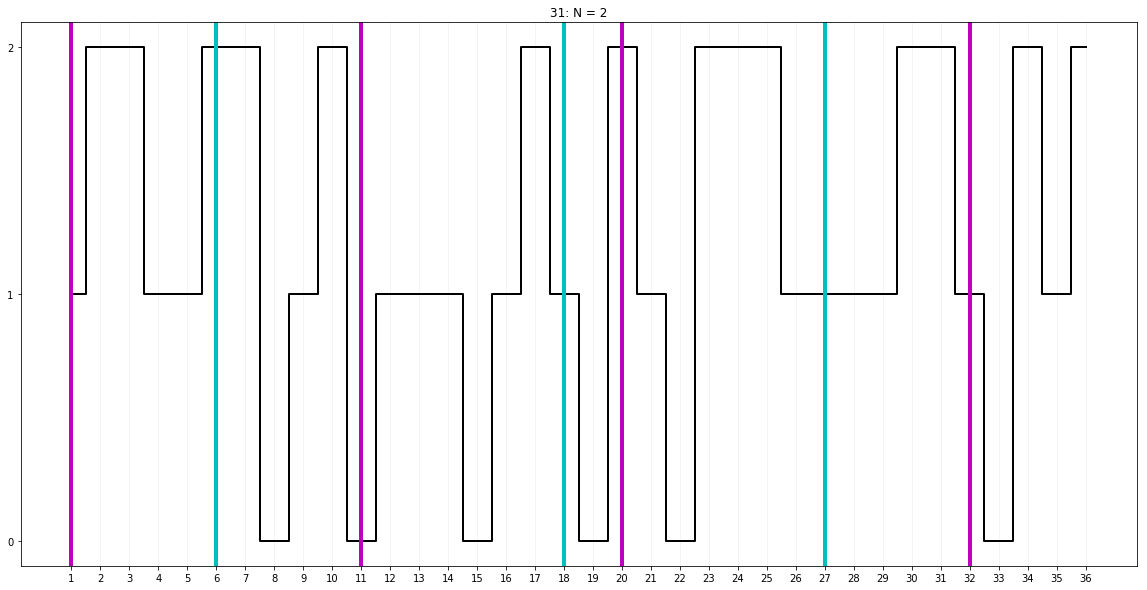

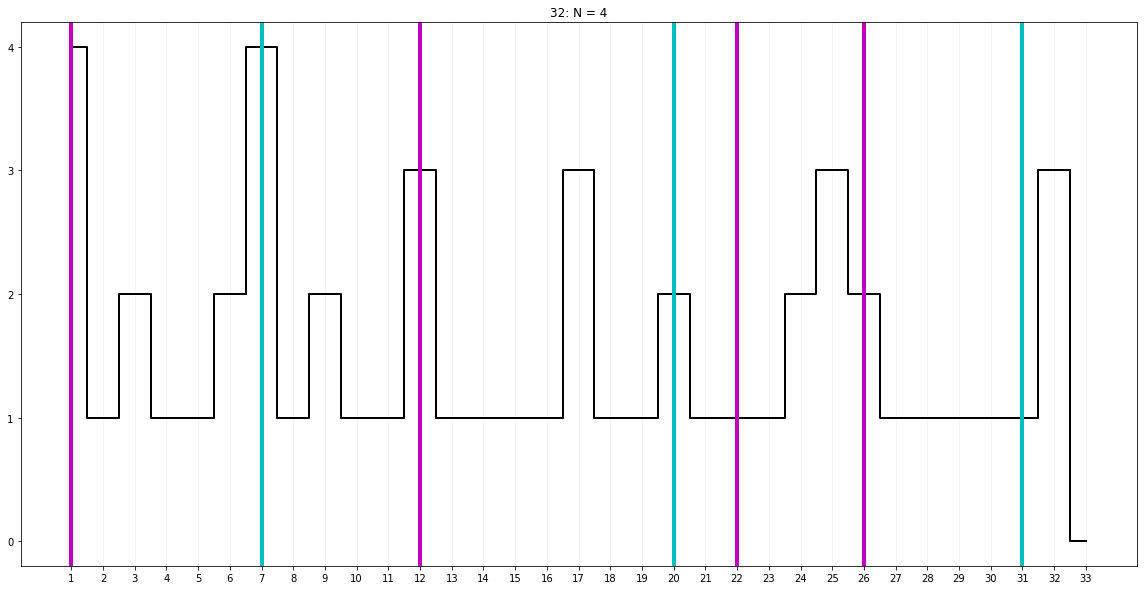

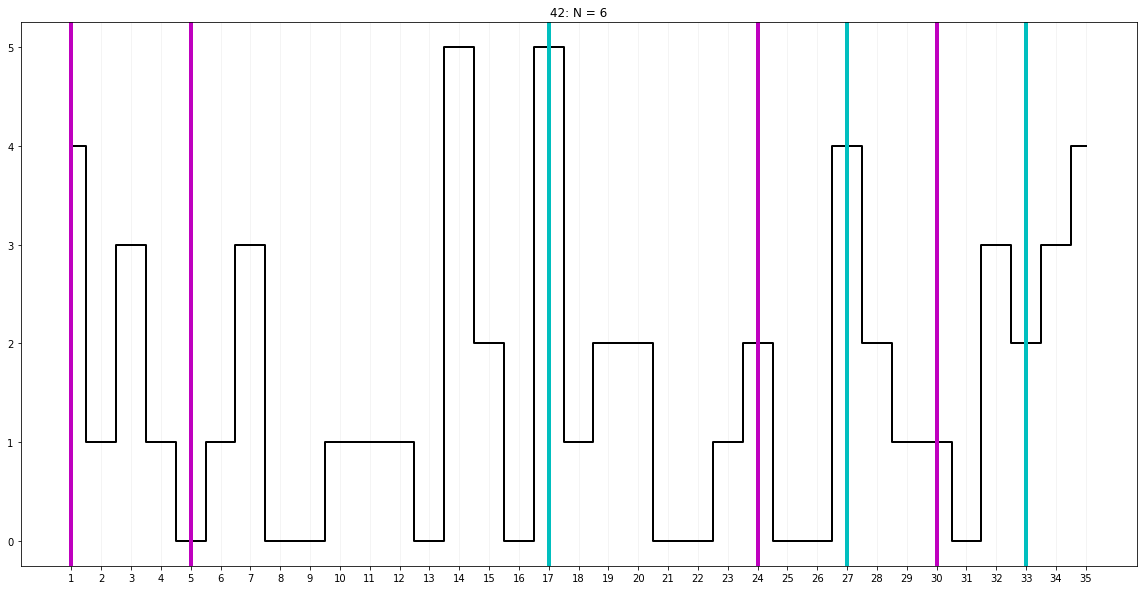

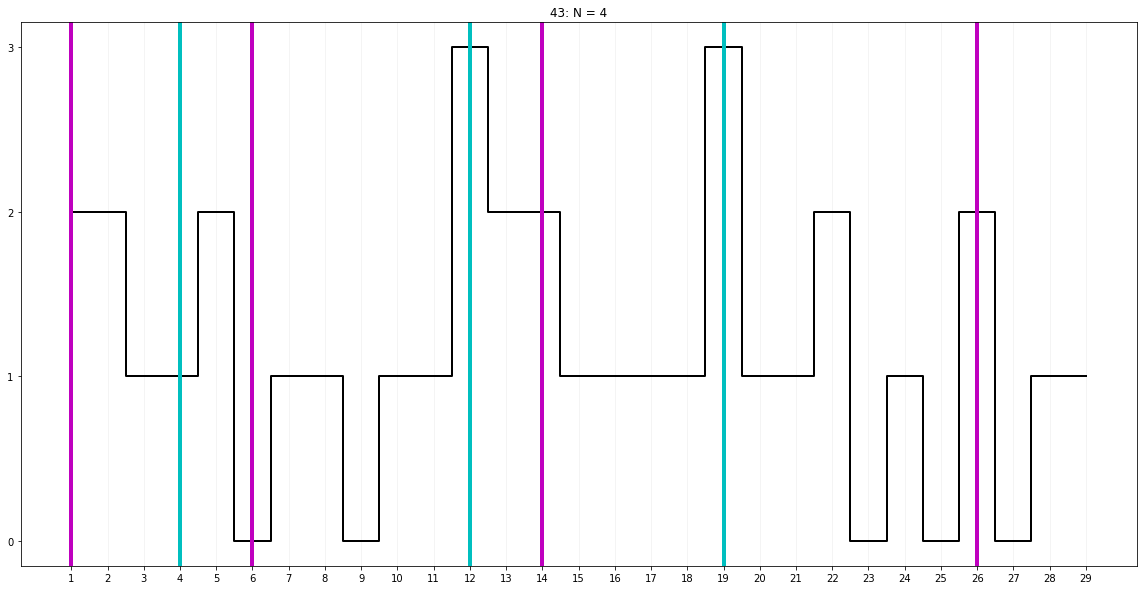

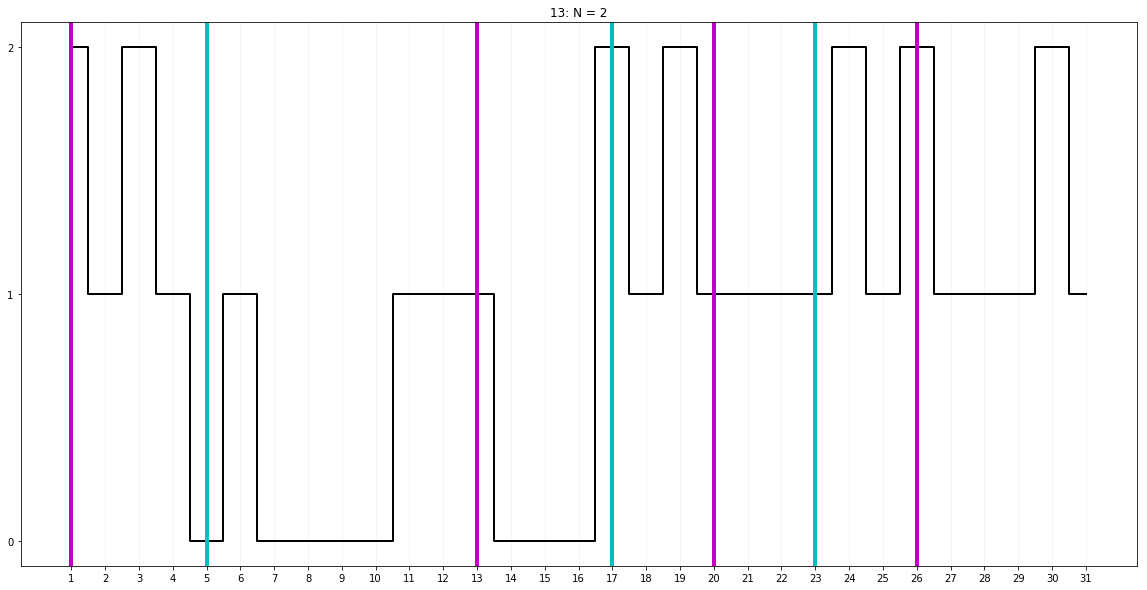

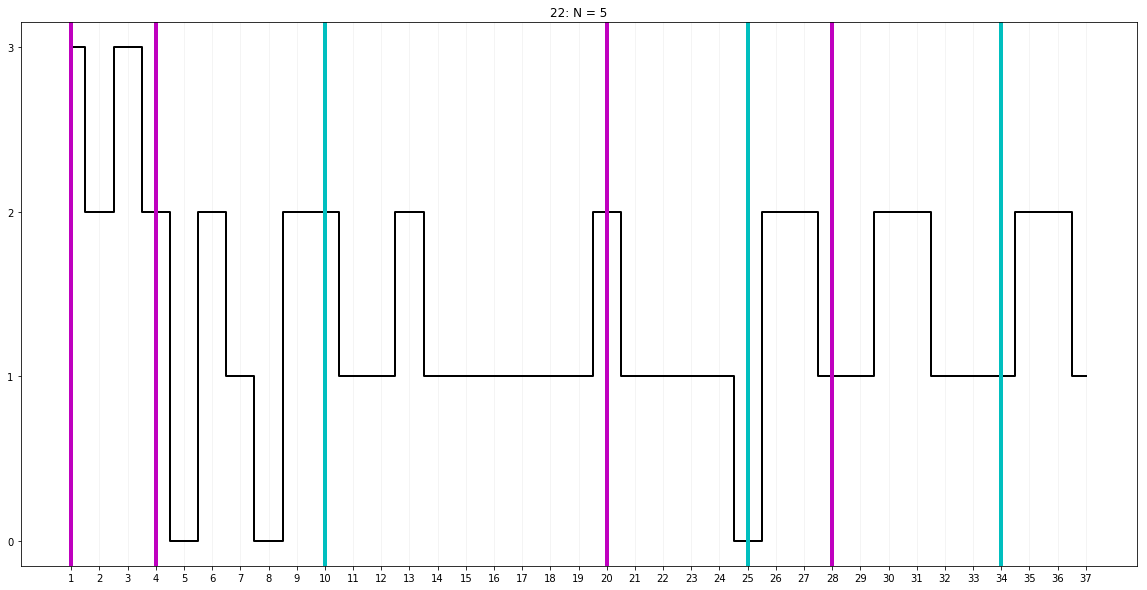

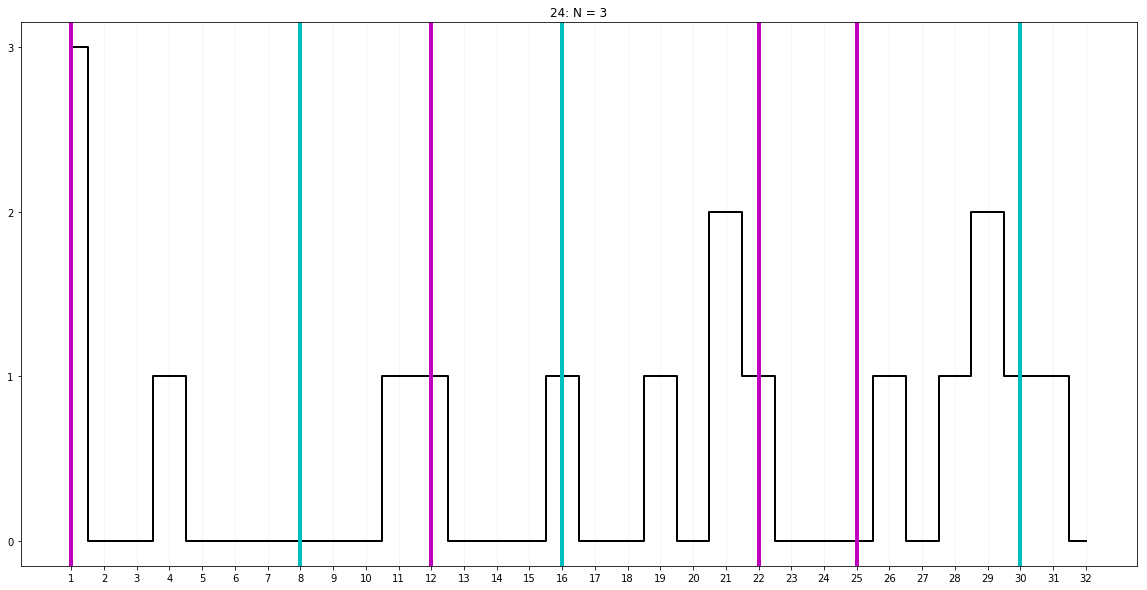

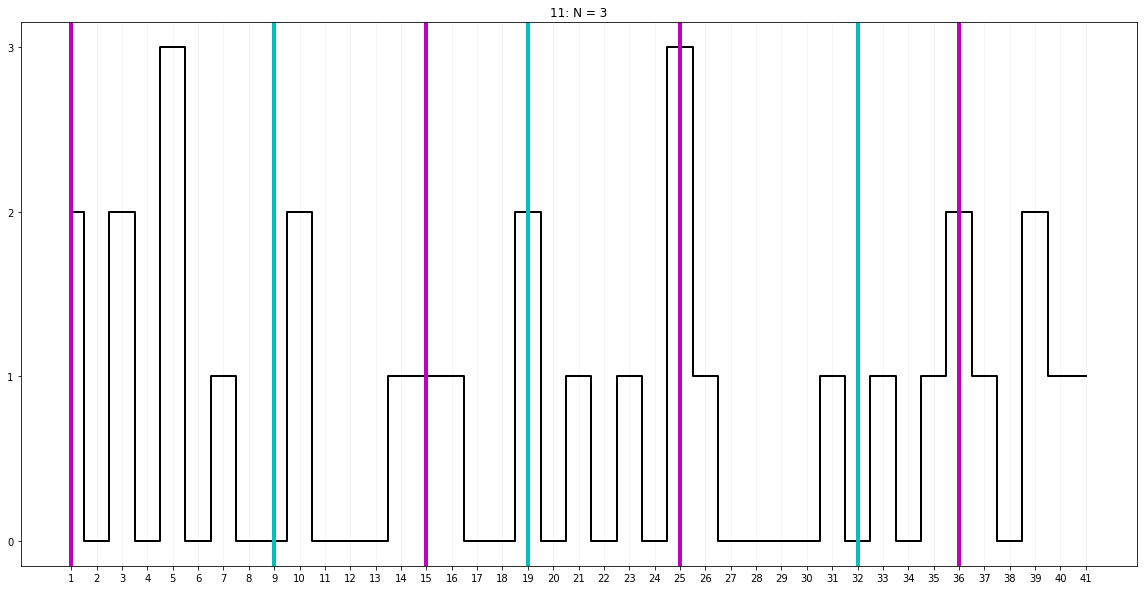

In [30]:
p_bounds = 1

for key in all_keys_s:
    plt.figure(figsize=(20,10))
    x = np.arange(1, (len(all_keys_s[key]) + 1))
    y = all_keys_s[key][:,0]
    plt.step(x, y, linewidth=2.0, where = 'mid', color = 'k')
    
    #tick marks
    yint = range(0, math.ceil(np.amax(all_keys_s[key]))+1)
    plt.yticks(yint)
    plt.xticks(x)
    
    #including p_bounds
    if p_bounds == 1:
        #add location boundaries
        loc_b = story_boundaries[key][:, 0]
        for i in range(0, len(loc_b)):
            if loc_b[i] == 1:
                plt.axvline(x = (i + 1), linewidth=4, color='c')
            else:
                pass
        #add social boundaries
        soc_b = story_boundaries[key][:, 1]
        for i in range(0, len(soc_b)):
            if soc_b[i] == 1:
                plt.axvline(x = (i + 1), linewidth=4, color='m')
            else:
                pass
    else:
        pass
    
    plt.grid(axis='x', color='0.95')
    title = str(key) + ': N = ' + str(sums[key][0])
    plt.title(title)
    plt.show()

## F. Plotting the percentage of the segmentation of all participants without discriminating between priming

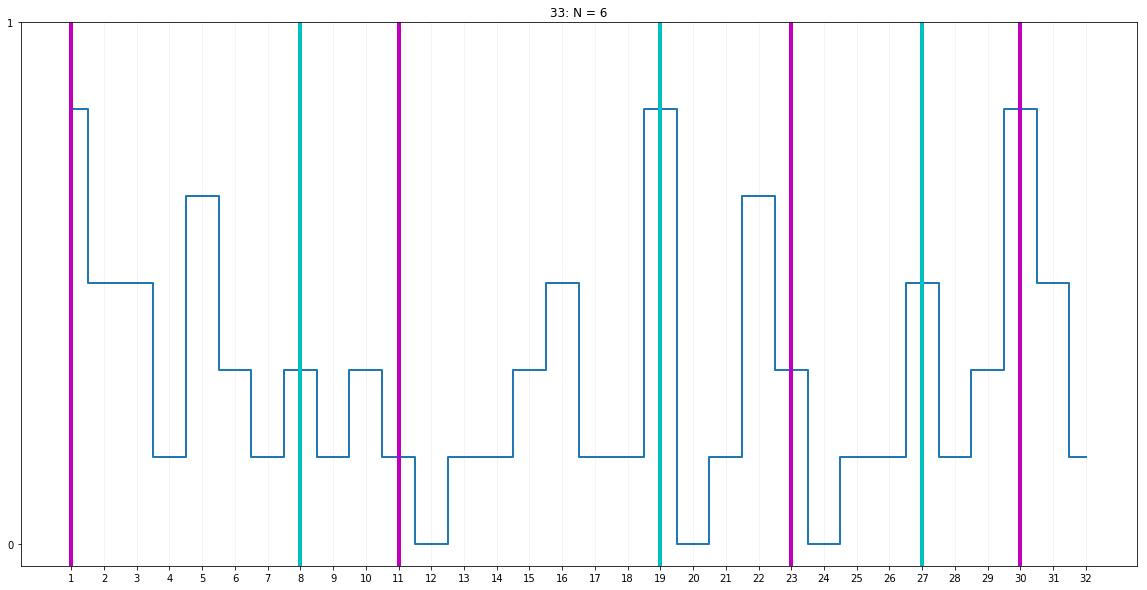

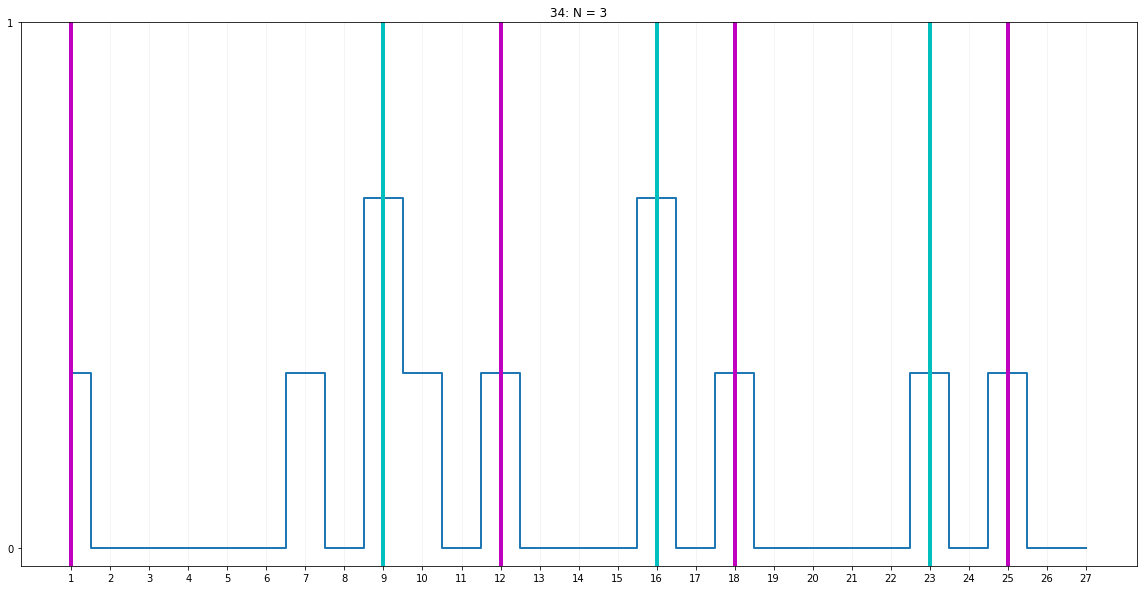

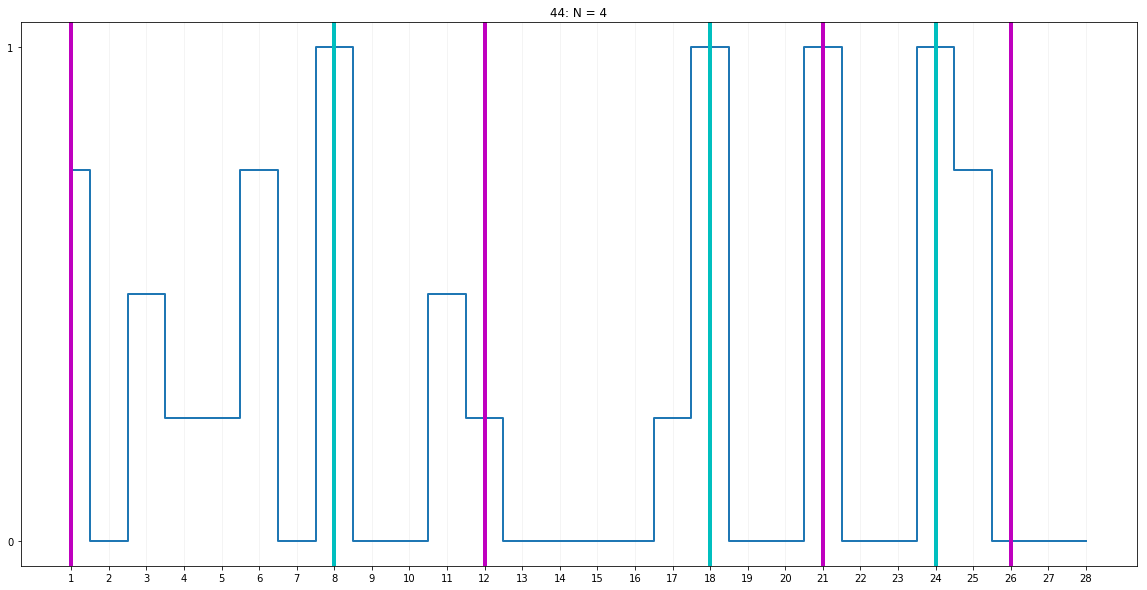

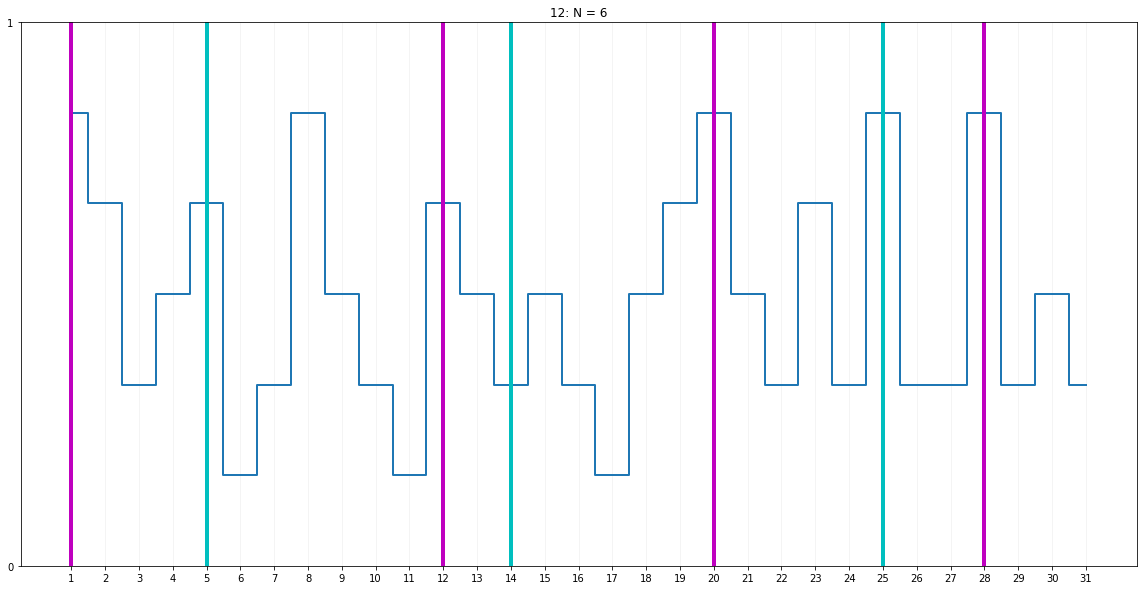

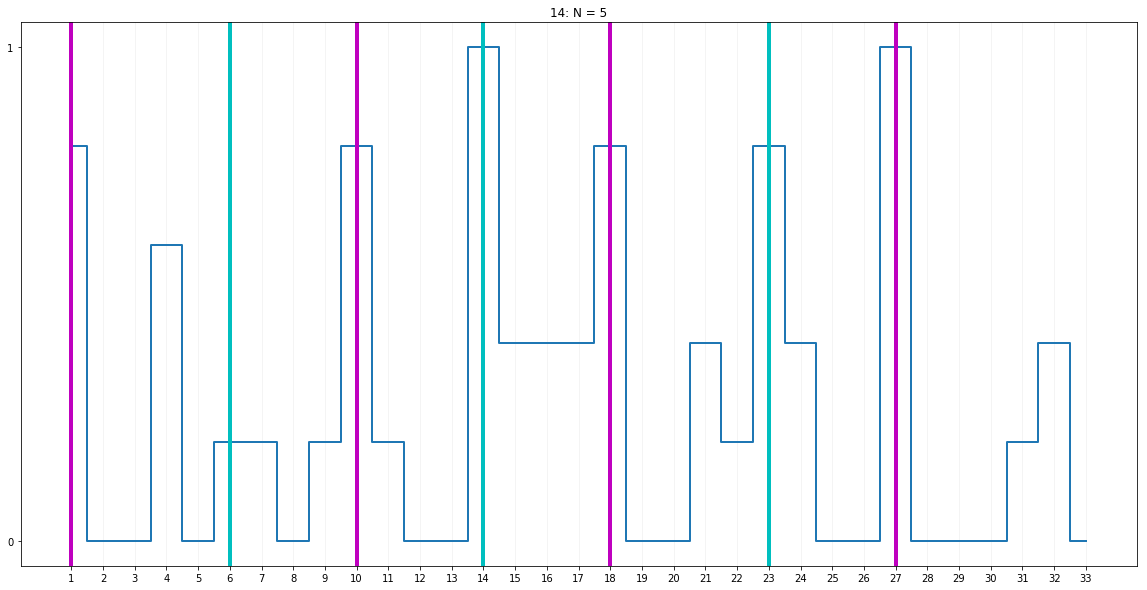

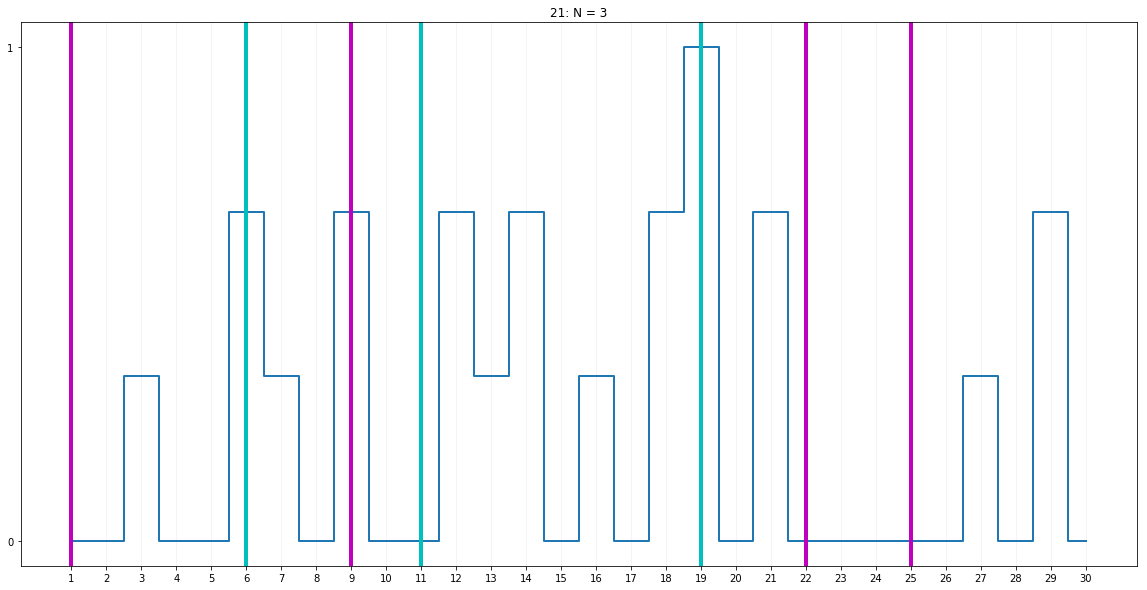

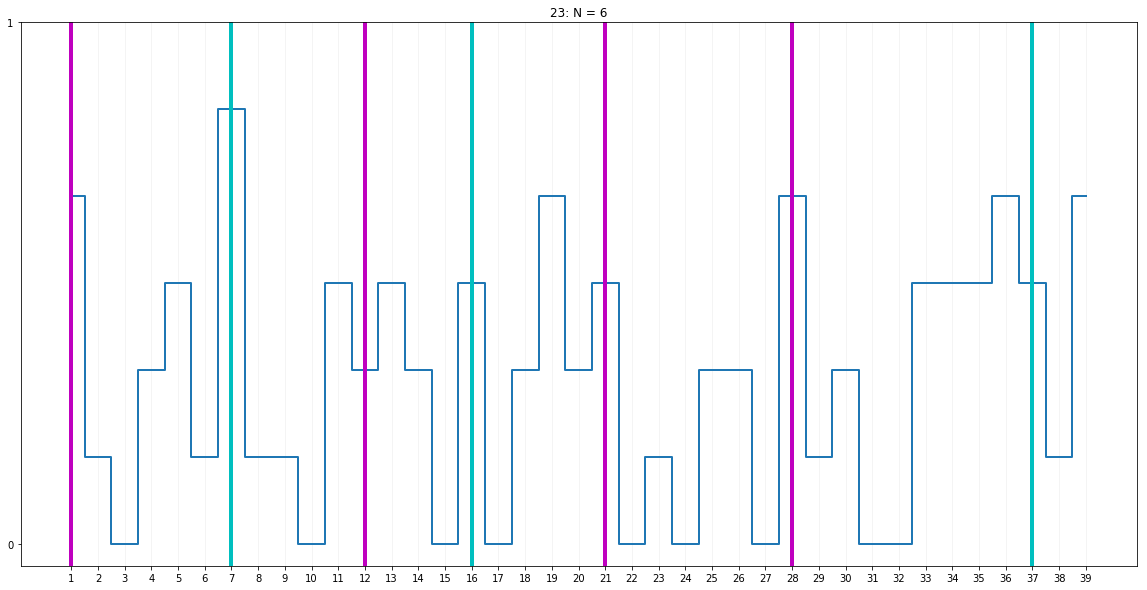

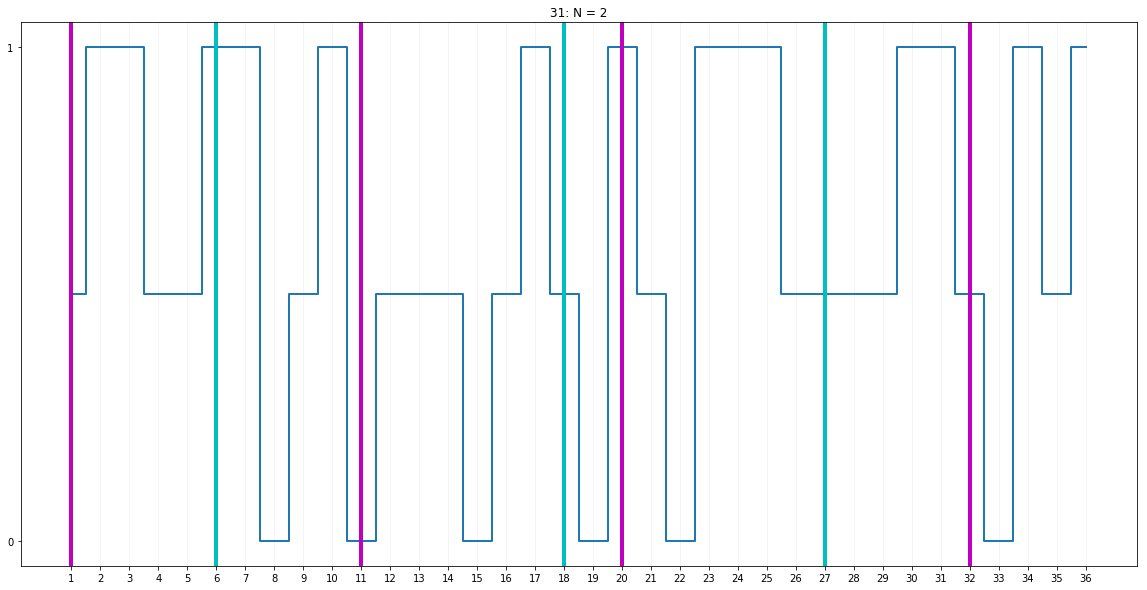

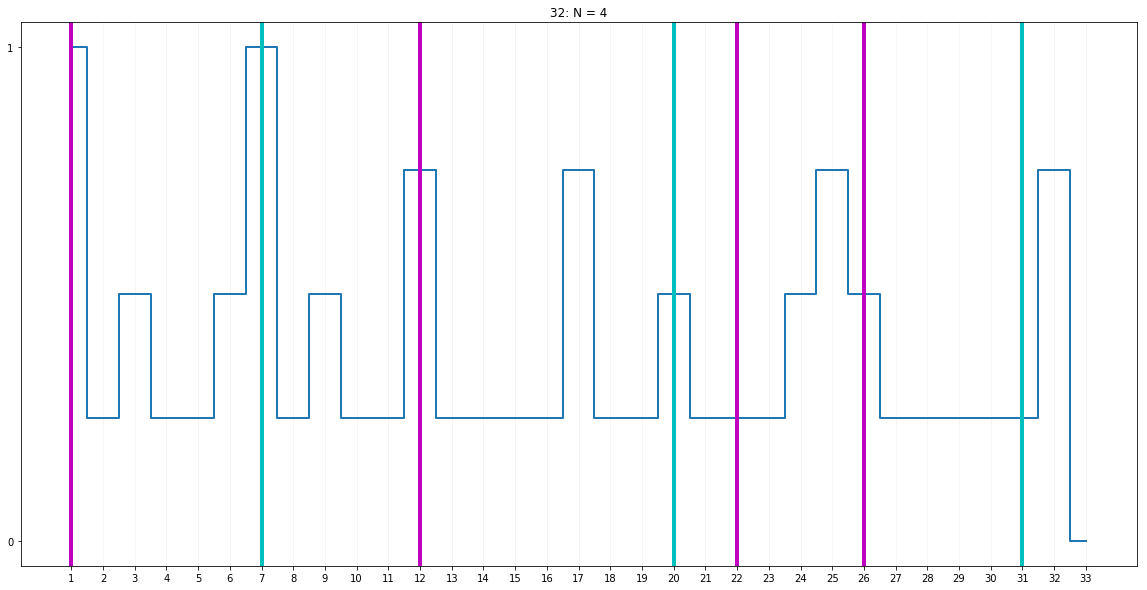

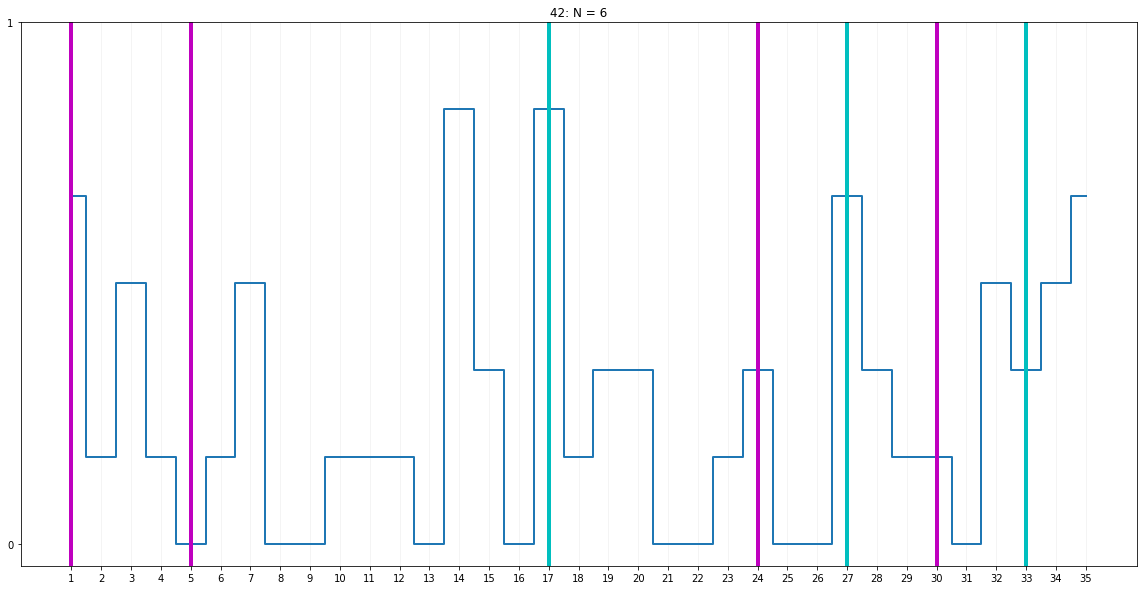

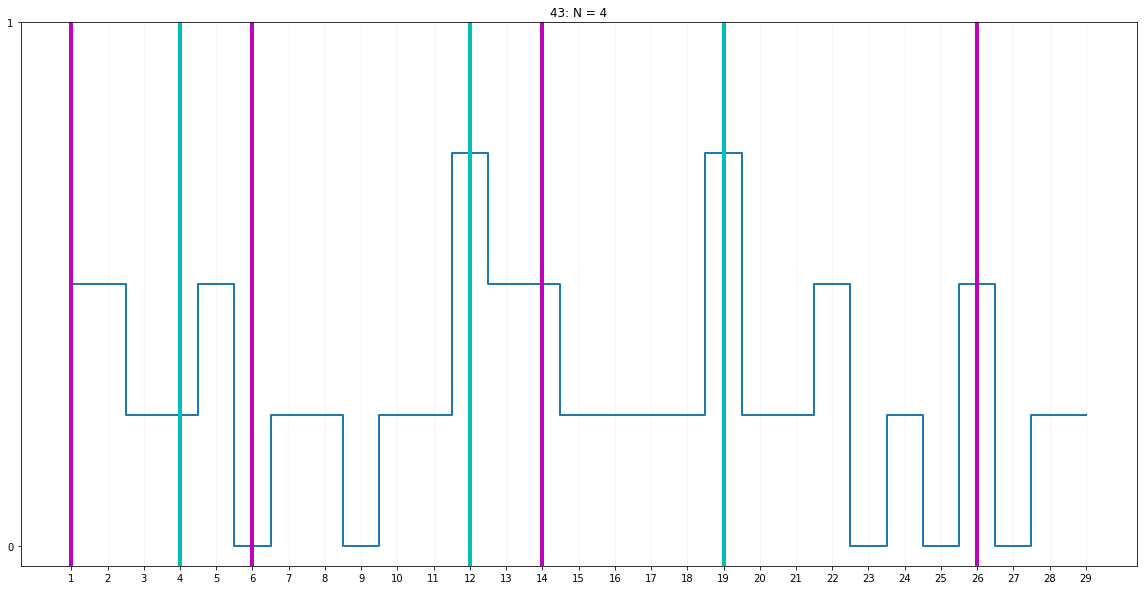

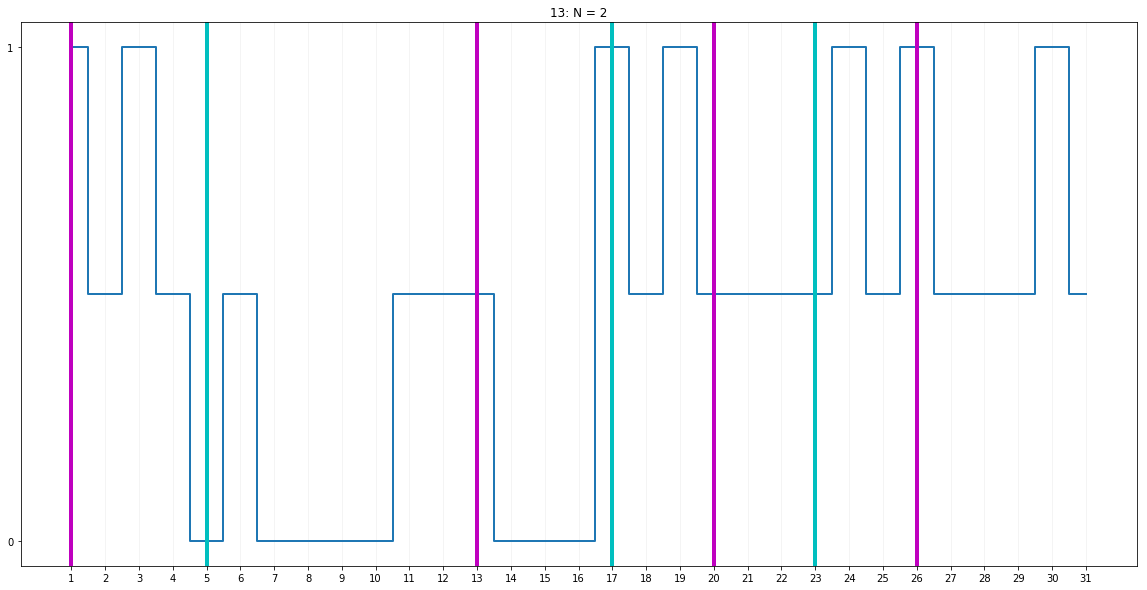

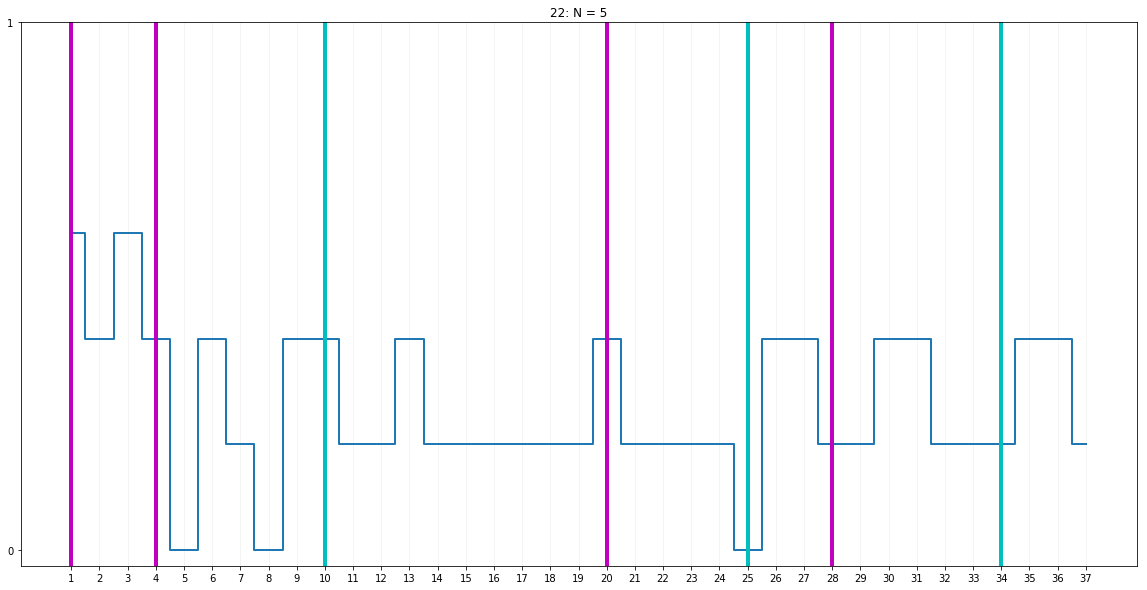

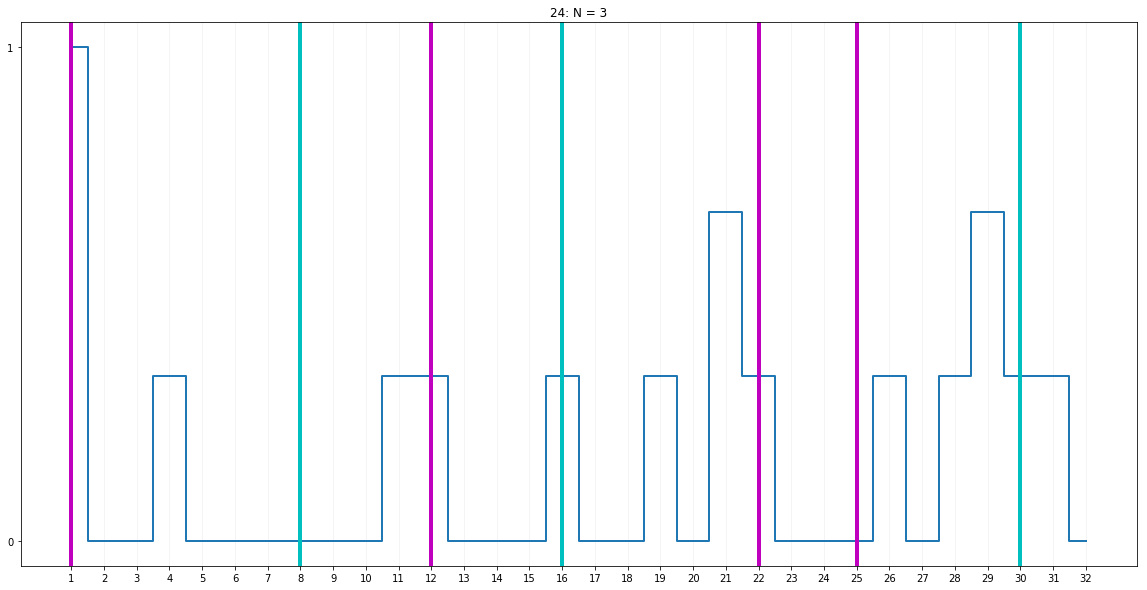

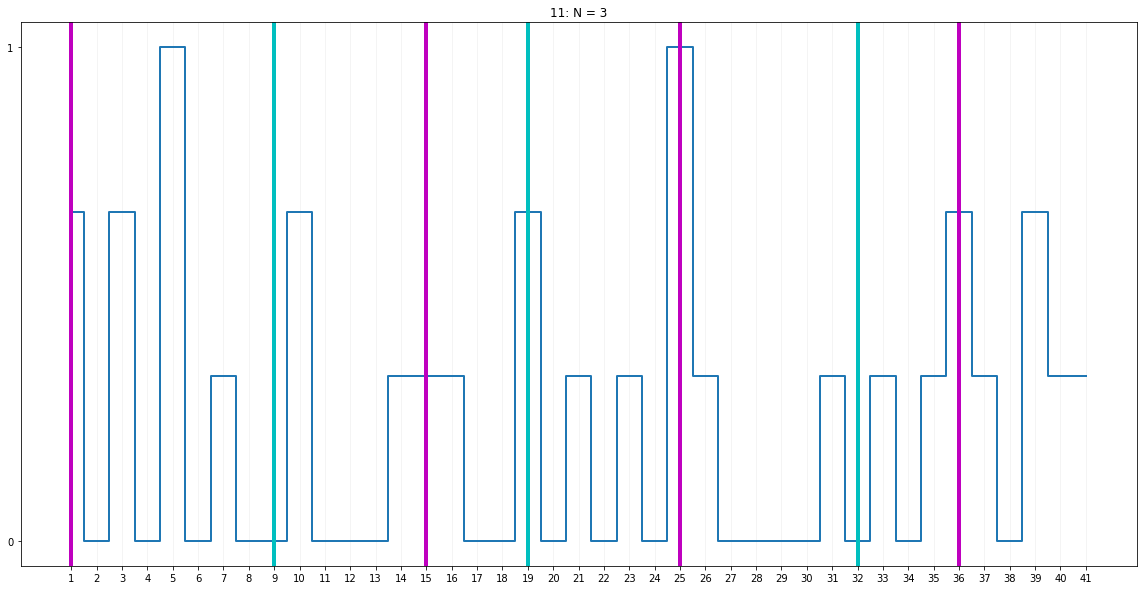

In [31]:
p_bounds = 1

for key in all_keys_s:
    plt.figure(figsize=(20,10))
    x = np.arange(1, (len(all_keys_s[key]) + 1))
    y = all_keys_s[key][:,1]
    plt.step(x, y, linewidth=2.0, where = 'mid')
    
    #tick marks
    yint = range(0, 2)
    plt.yticks(yint)
    plt.xticks(x)
    
     #including p_bounds
    if p_bounds == 1:
        #add location boundaries
        loc_b = story_boundaries[key][:, 0]
        for i in range(0, len(loc_b)):
            if loc_b[i] == 1:
                plt.axvline(x = (i + 1), linewidth=4, color='c')
            else:
                pass
        #add social boundaries
        soc_b = story_boundaries[key][:, 1]
        for i in range(0, len(soc_b)):
            if soc_b[i] == 1:
                plt.axvline(x = (i + 1), linewidth=4, color='m')
            else:
                pass
    else:
        pass
    
    plt.grid(axis='x', color='0.95')
    title = str(key) + ': N = ' + str(sums[key][0])
    plt.title(title)
    plt.show()

## G. Plotting the sum of the segmentation of all participants discrimentating between no prime, location, social prime

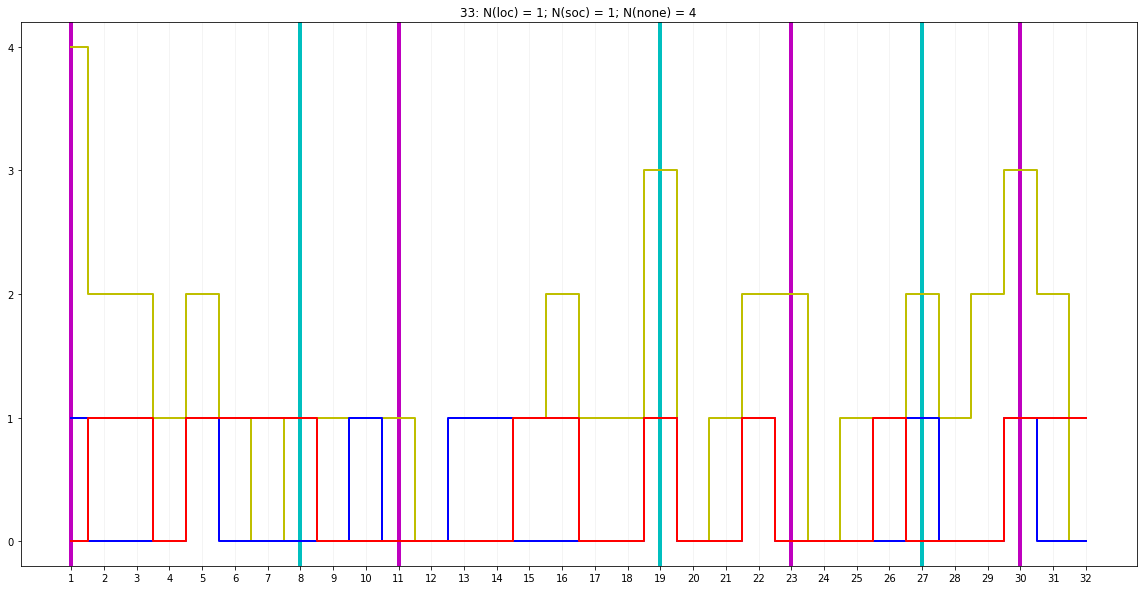

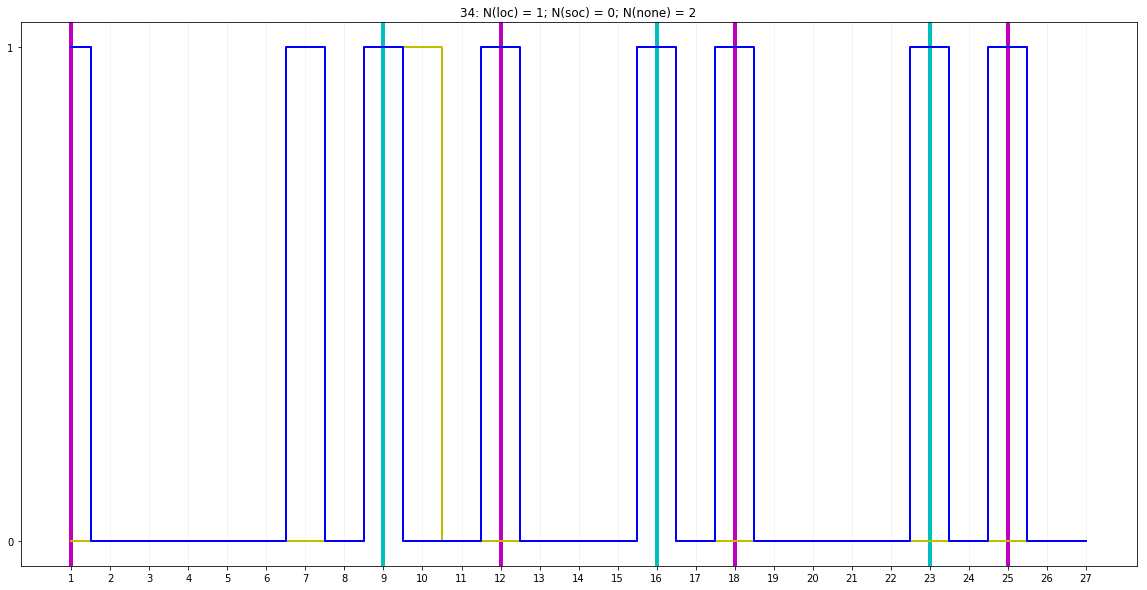

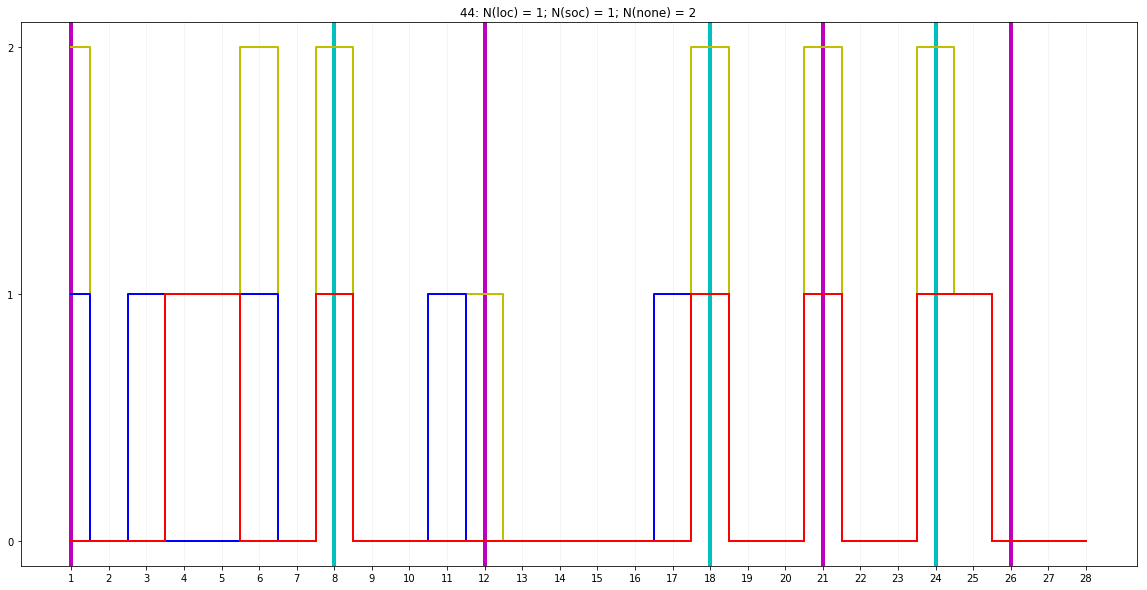

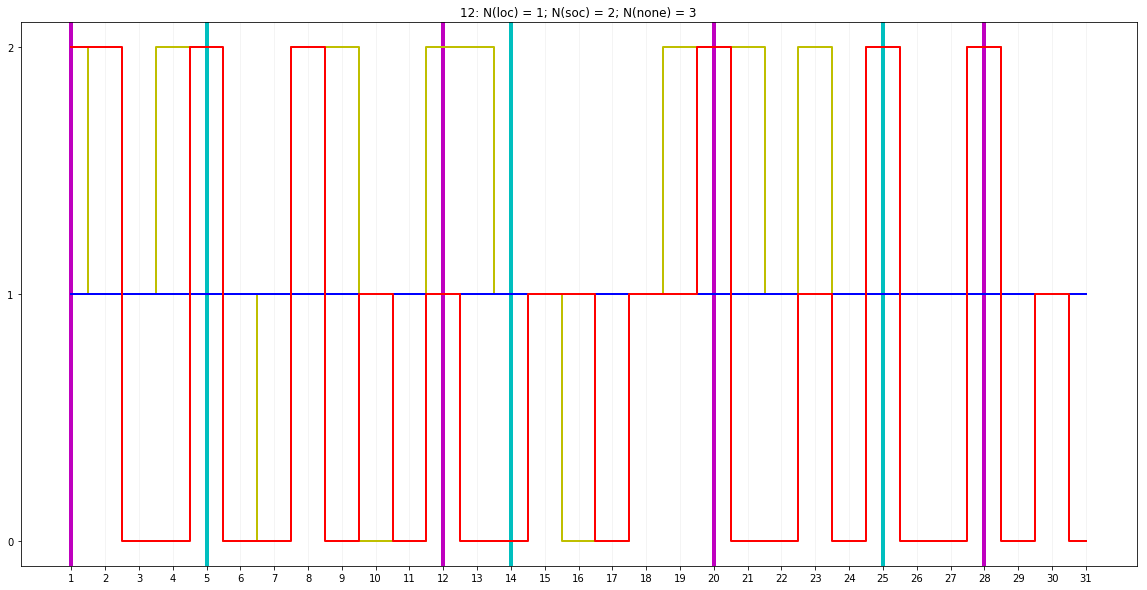

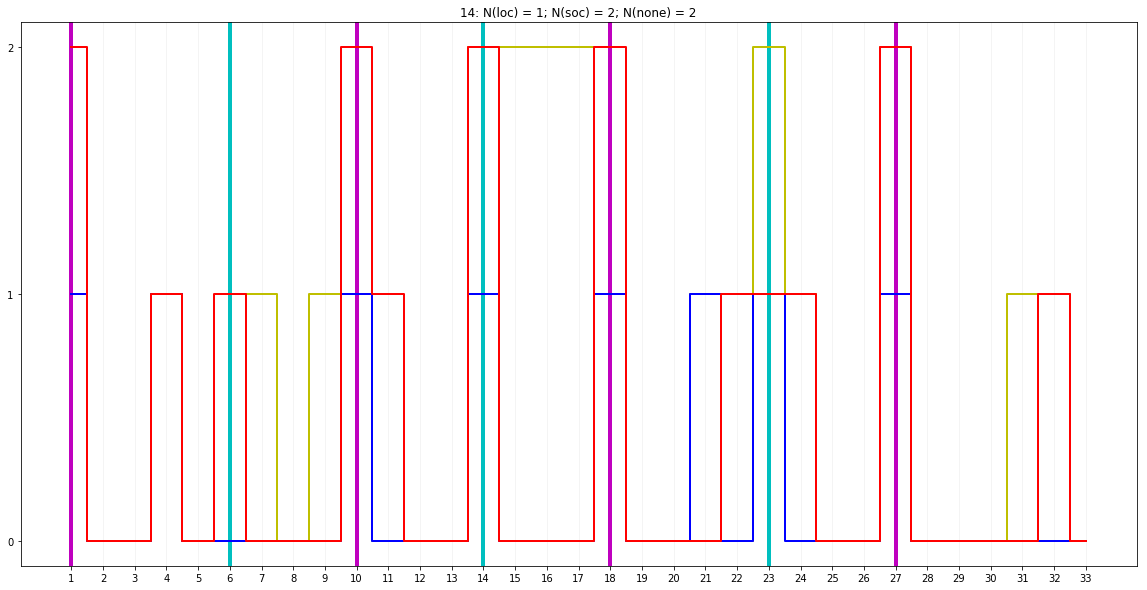

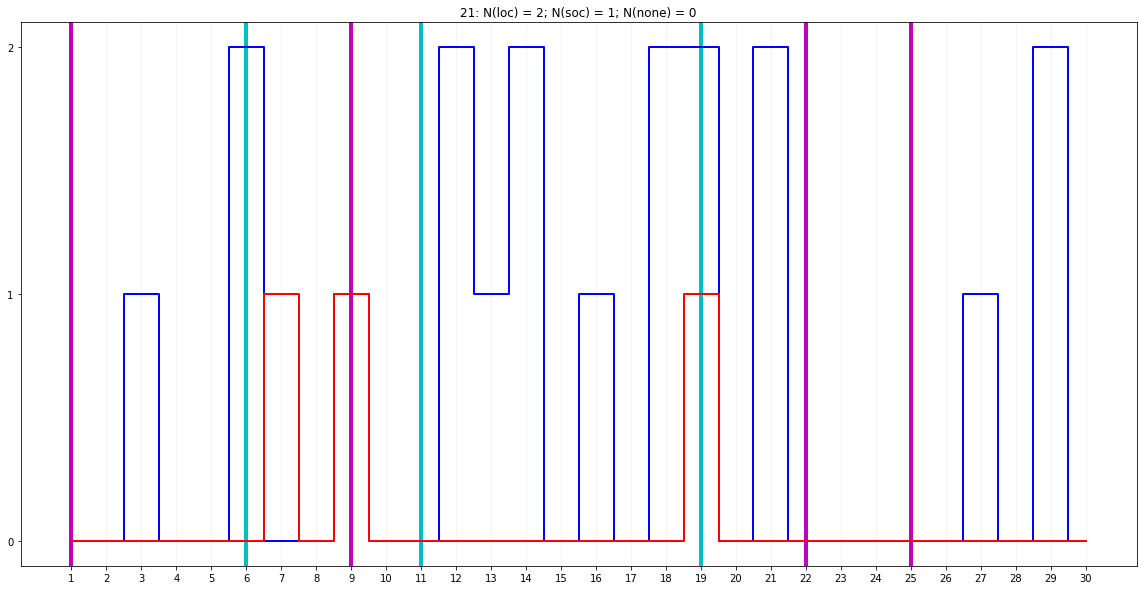

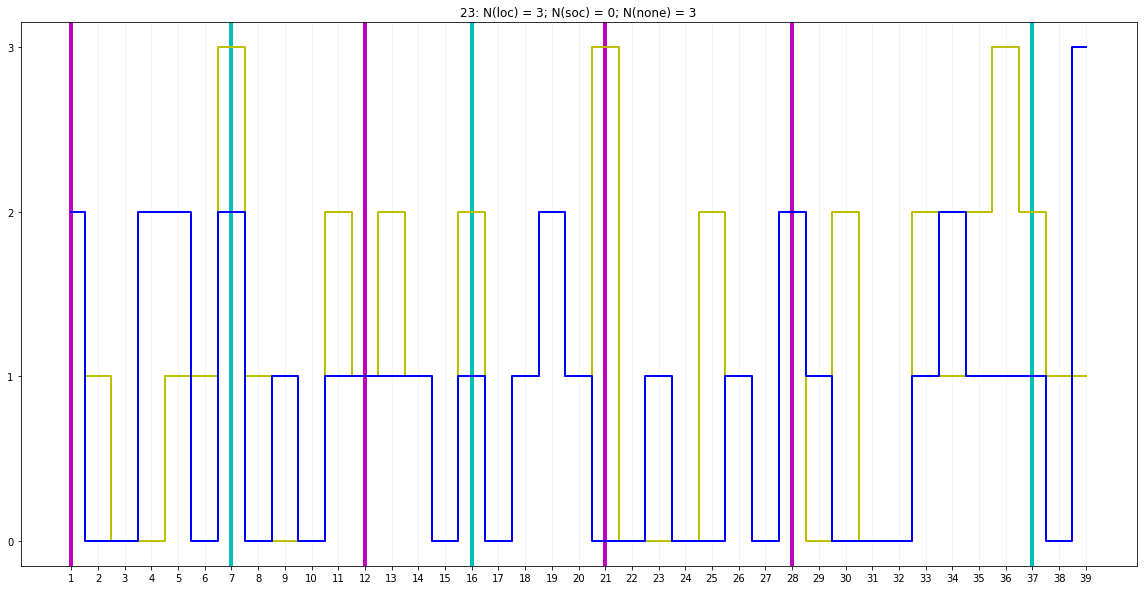

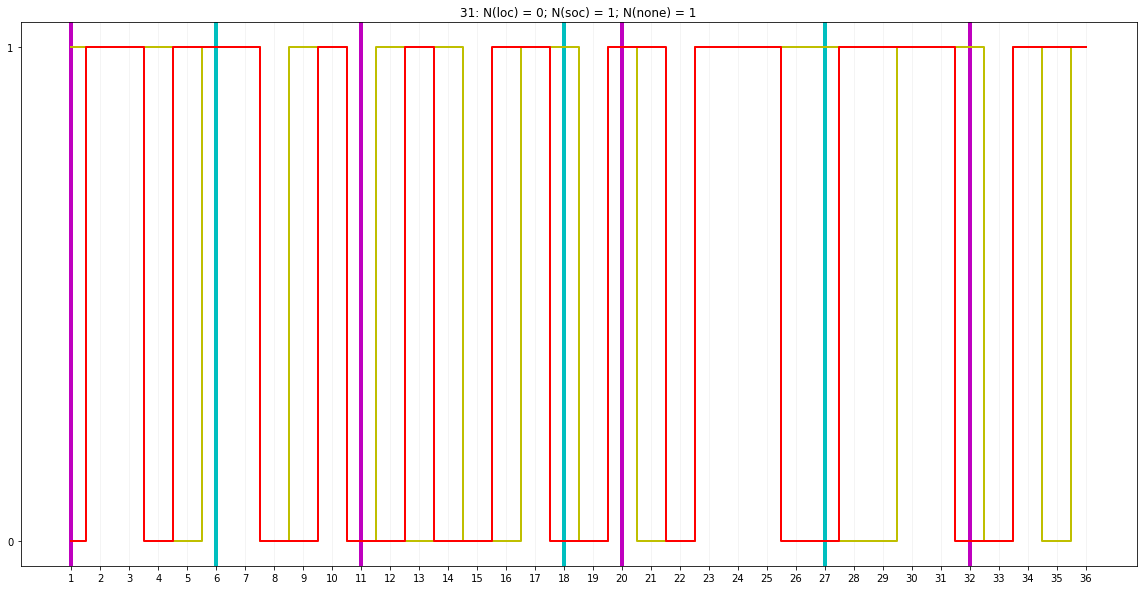

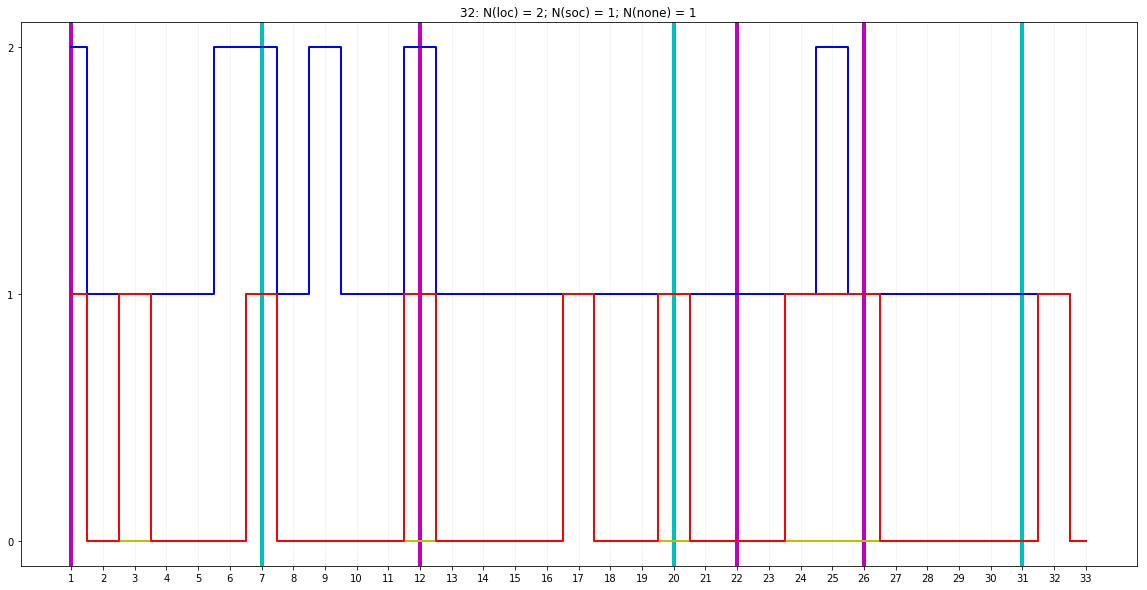

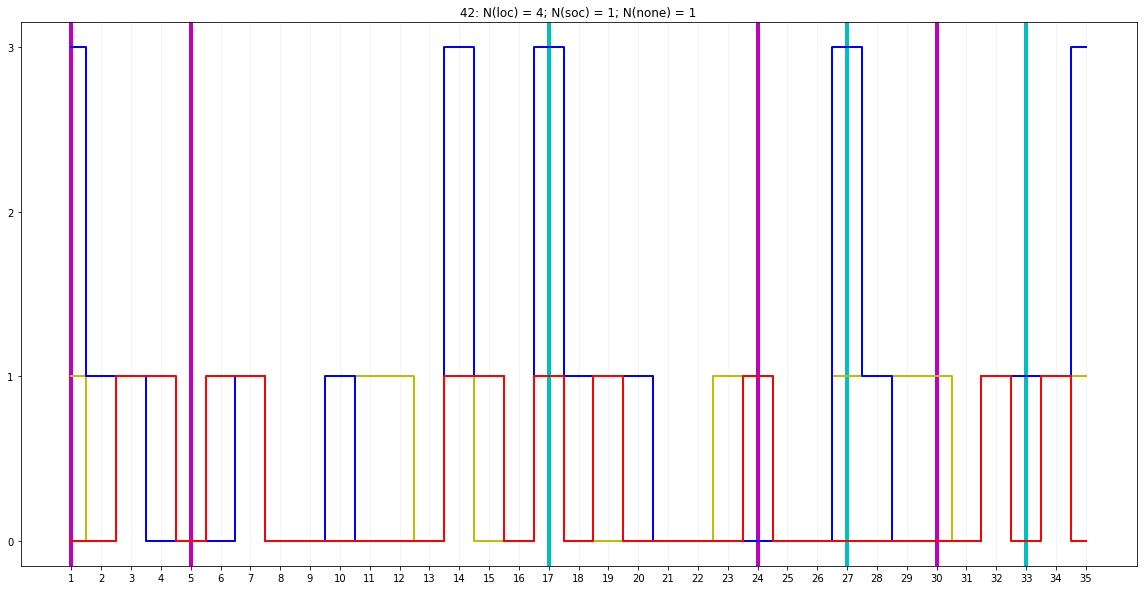

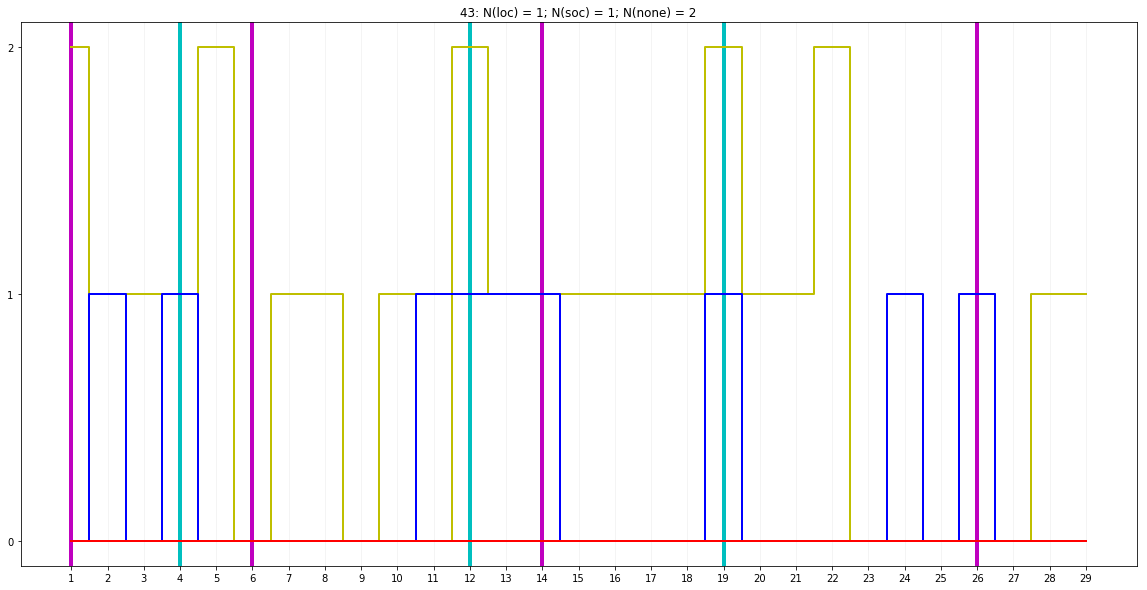

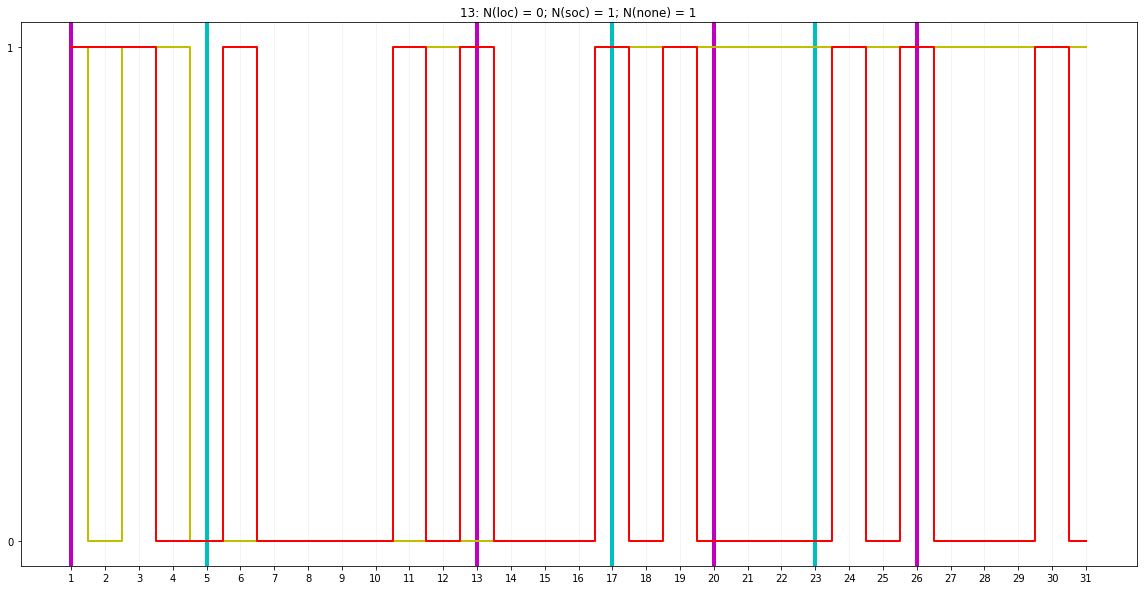

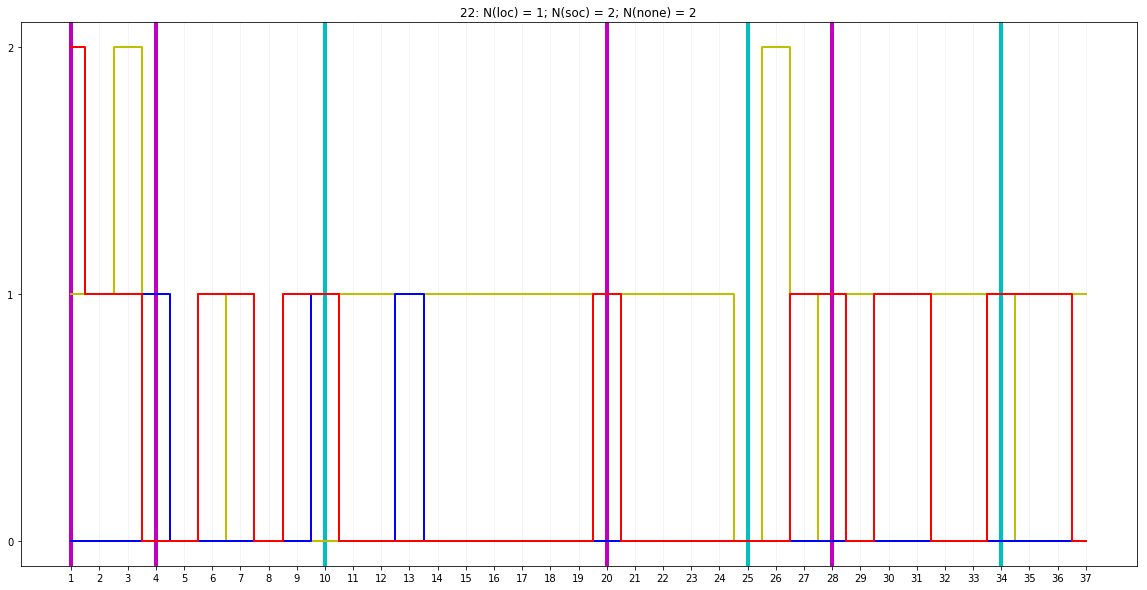

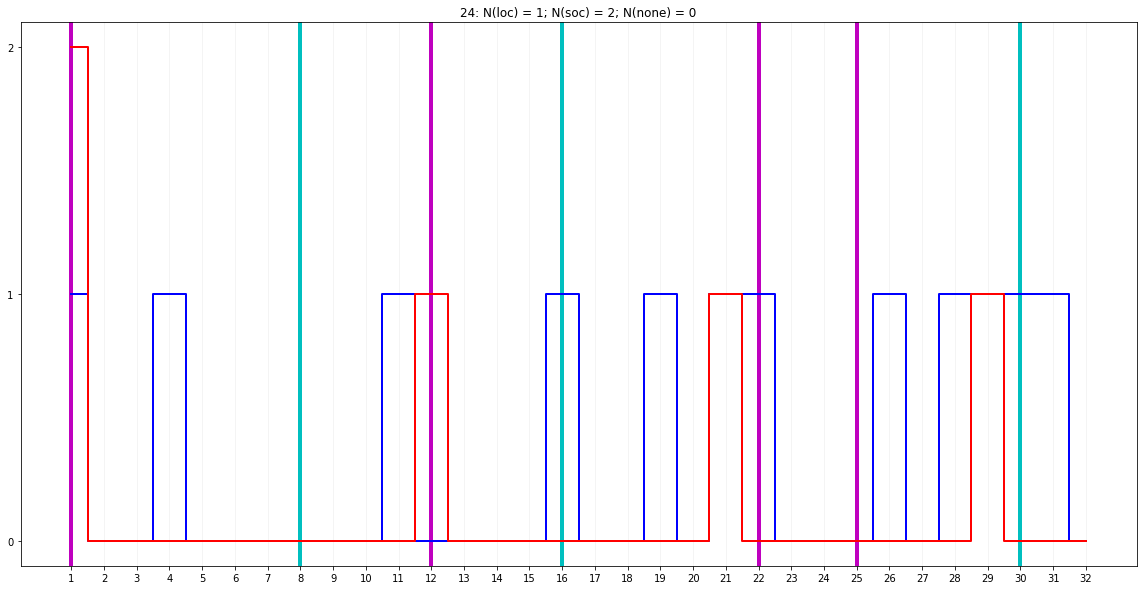

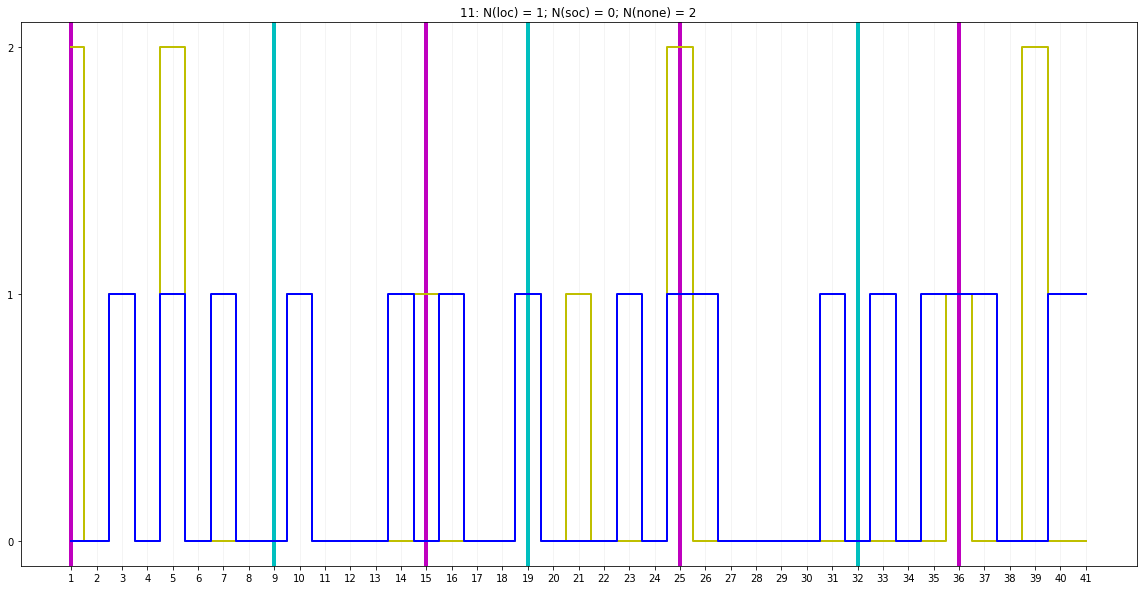

In [43]:
p_bounds = 1

color = ['y', 'b', 'r']
distinct_keys = [none_keys_s, loc_keys_s, soc_keys_s]

for key in all_keys:
    plt.figure(figsize=(20,10))
    #x coords
    x = np.arange(1, (len(all_keys_s[key]) + 1))
    #tick marks
    yint = range(0, math.ceil(np.amax(all_keys_s[key]))+1)
    plt.yticks(yint)
    plt.xticks(x)
    #including p_bounds
    if p_bounds == 1:
        #add location boundaries
        loc_b = story_boundaries[key][:, 0]
        for i in range(0, len(loc_b)):
            if loc_b[i] == 1:
                plt.axvline(x = (i + 1), linewidth=4, color='c')
            else:
                pass
        #add social boundaries
        soc_b = story_boundaries[key][:, 1]
        for i in range(0, len(soc_b)):
            if soc_b[i] == 1:
                plt.axvline(x = (i + 1), linewidth=4, color='m')
            else:
                pass
    else:
        pass
    #iterating through all the dictionaries
    for i in range(3):
        if key in distinct_keys[i]:
            y = distinct_keys[i][key][:,0]
            plt.step(x, y, linewidth=2.0, where = 'mid', color = color[i])
        else:
            pass
    plt.grid(axis='x', color='0.95')
    title = str(key) + ': N(loc) = ' + str(sums[key][1]) + '; N(soc) = ' + str(sums[key][2]) + '; N(none) = ' + str(sums[key][3]) 
    plt.title(title)
    plt.show()

## H. Plotting the percentage of the segmentation of all participants discrimentating between no prime, location, social prime

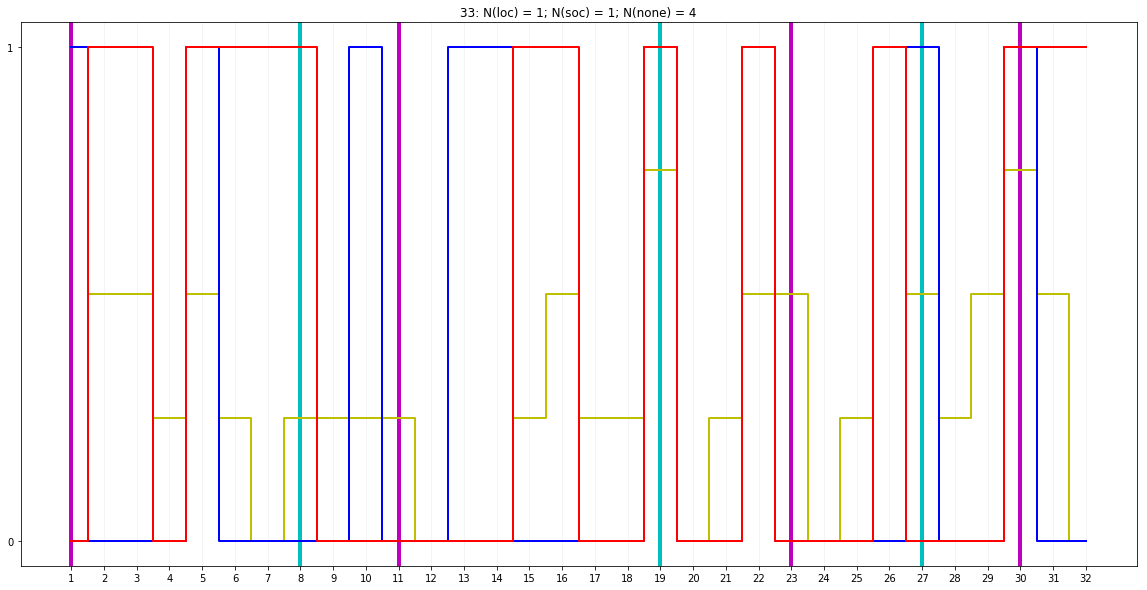

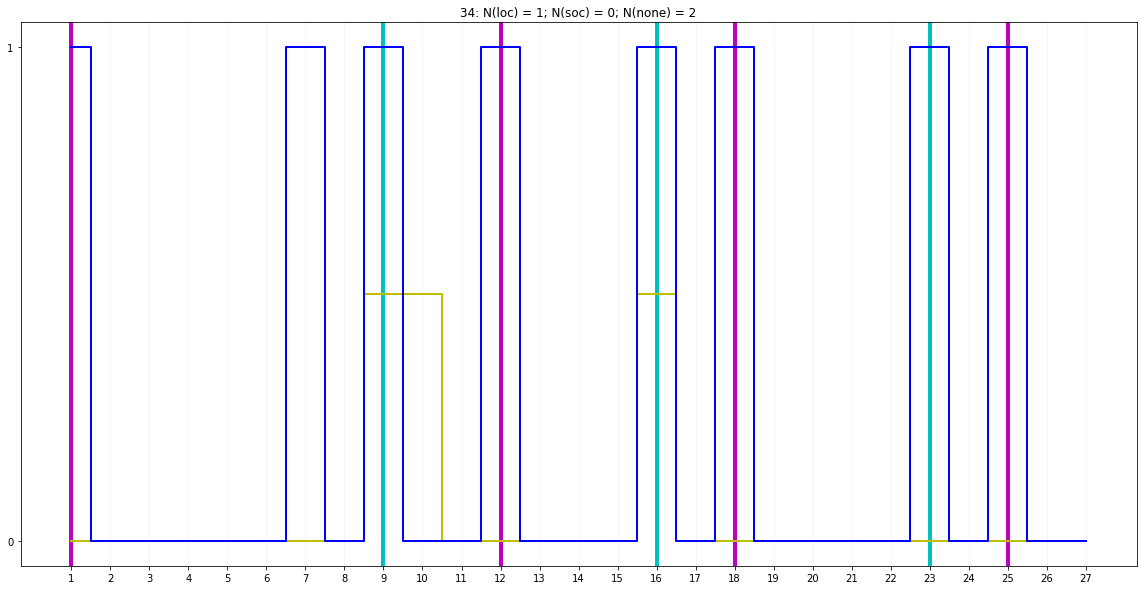

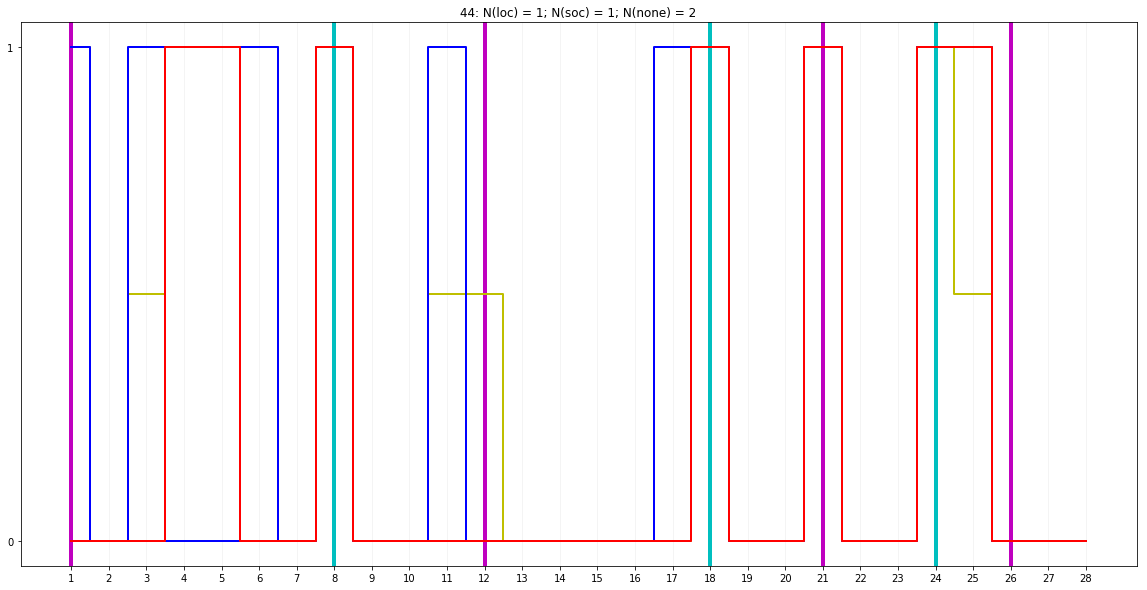

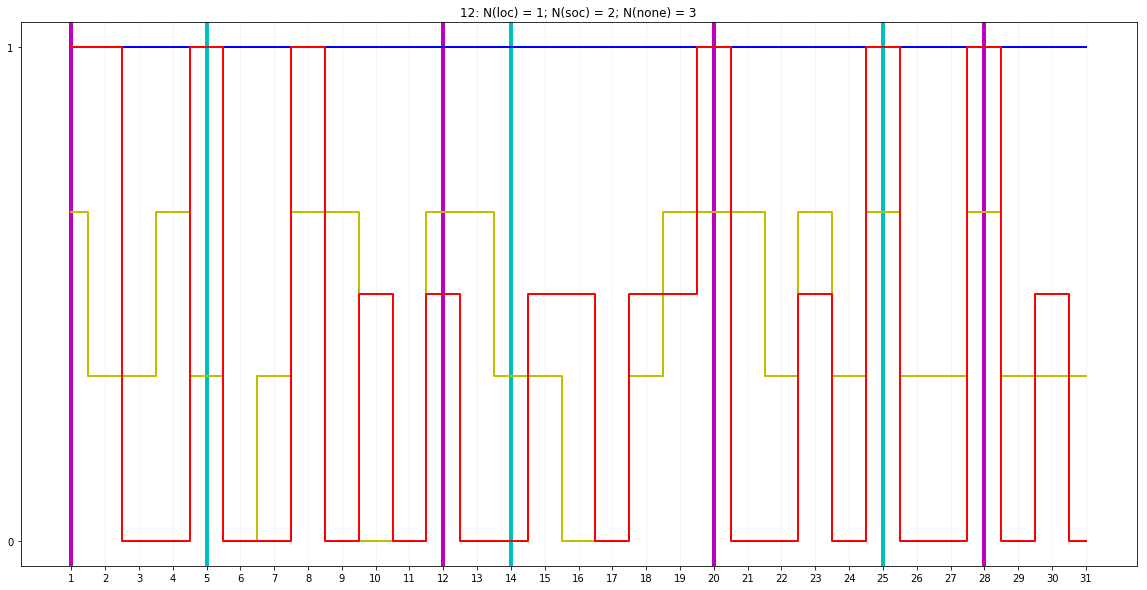

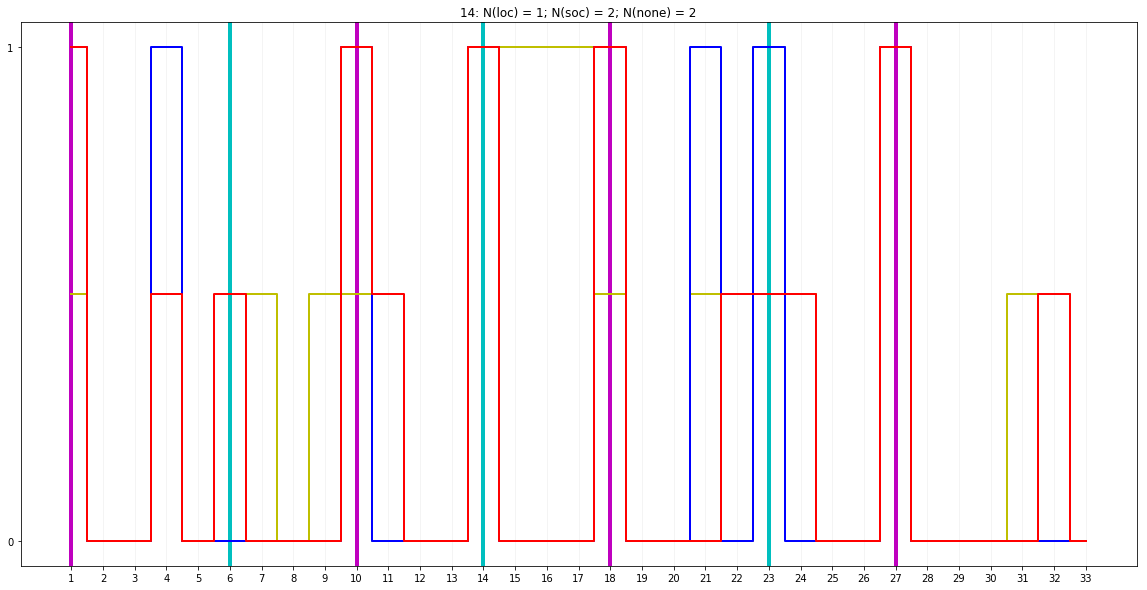

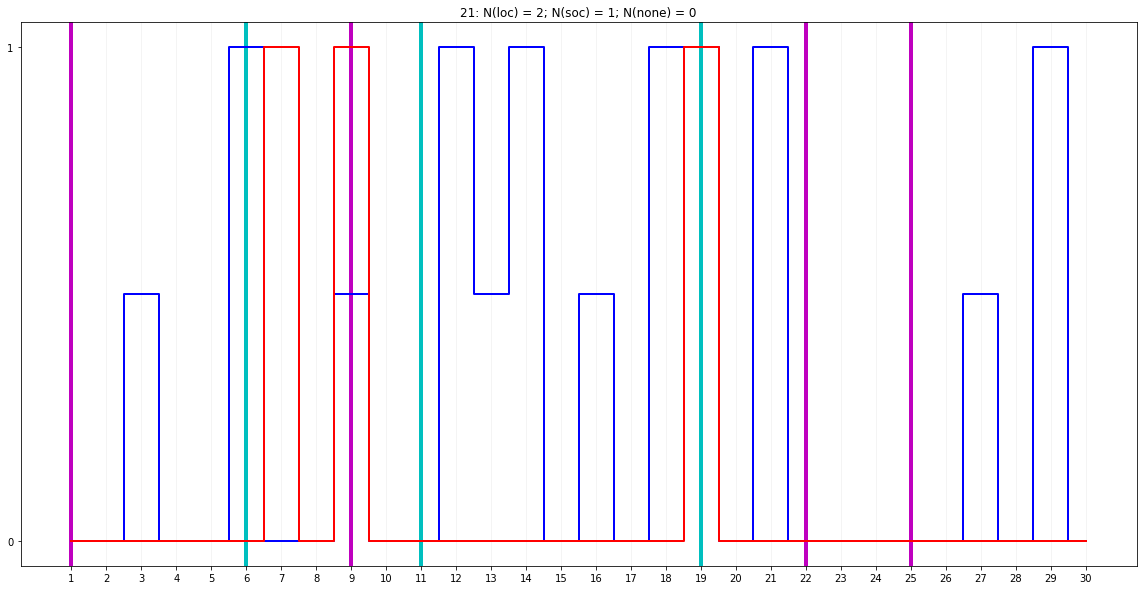

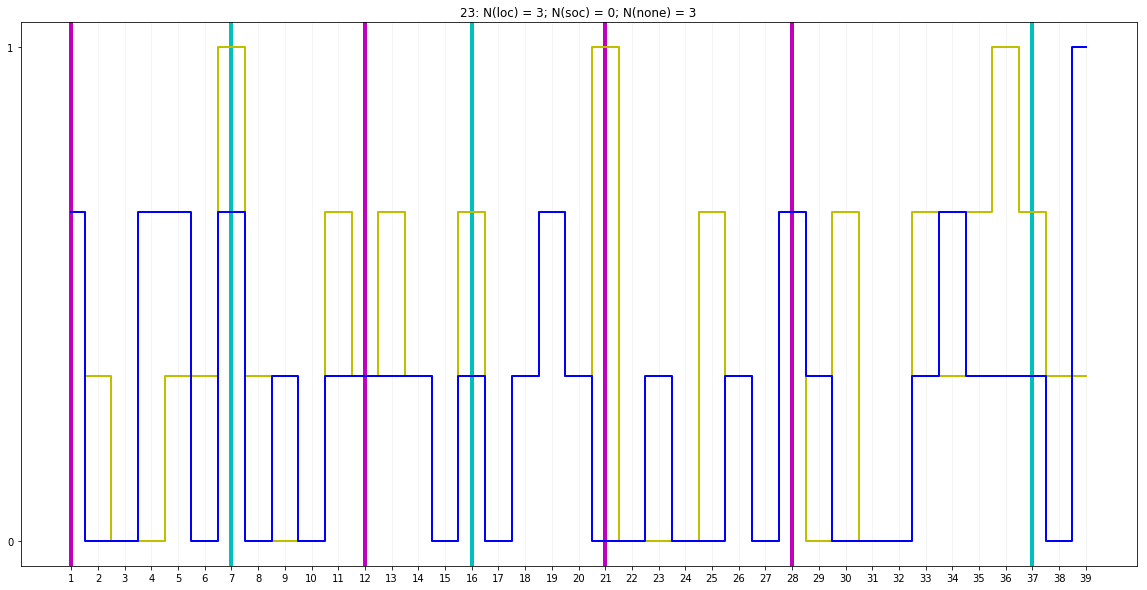

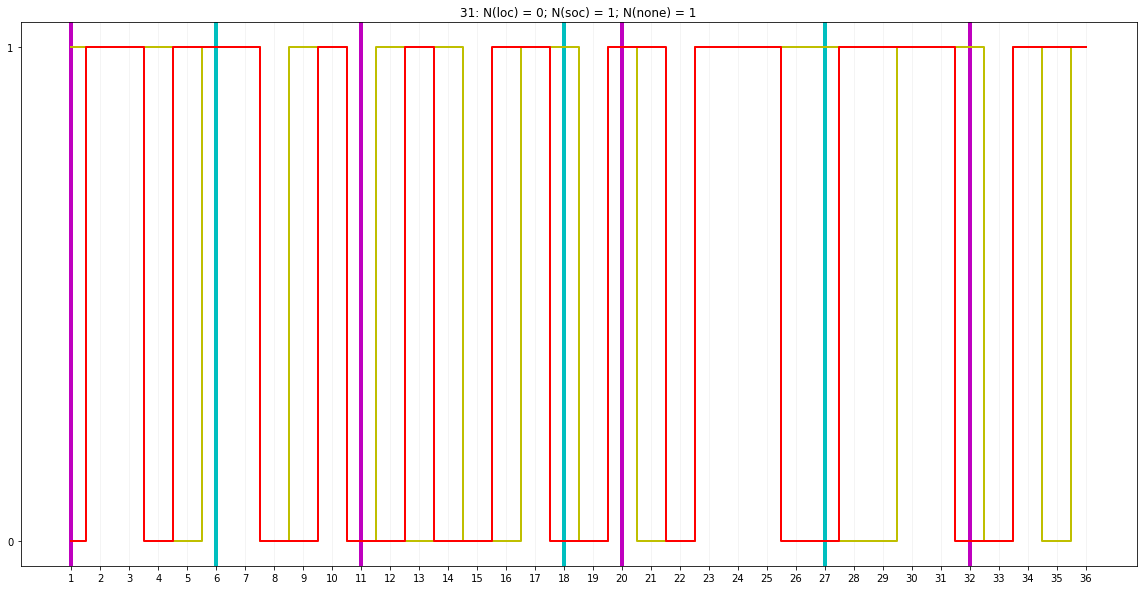

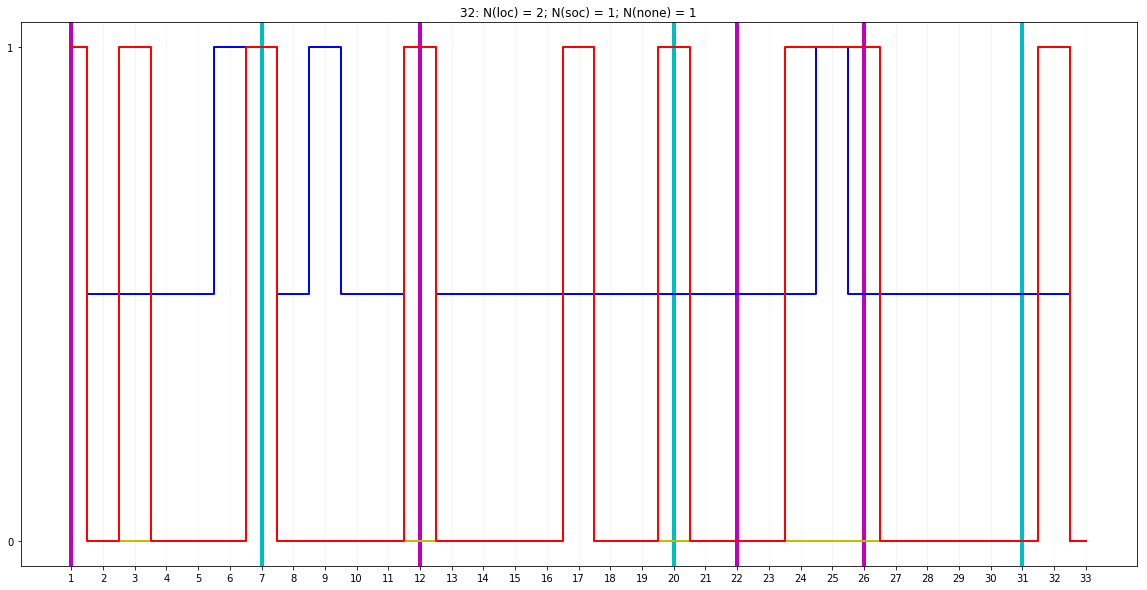

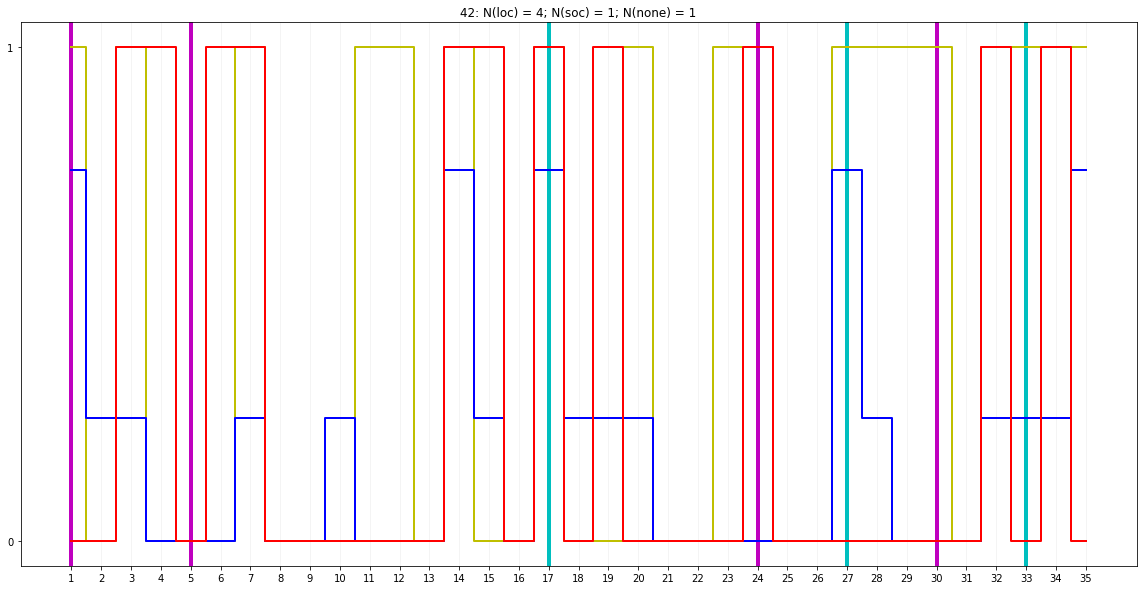

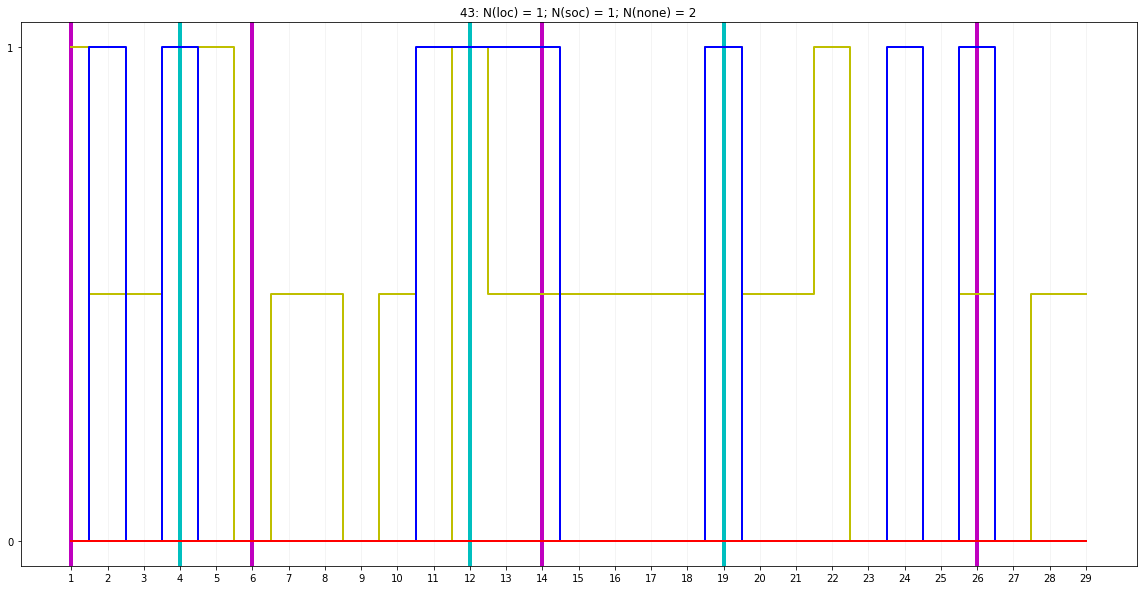

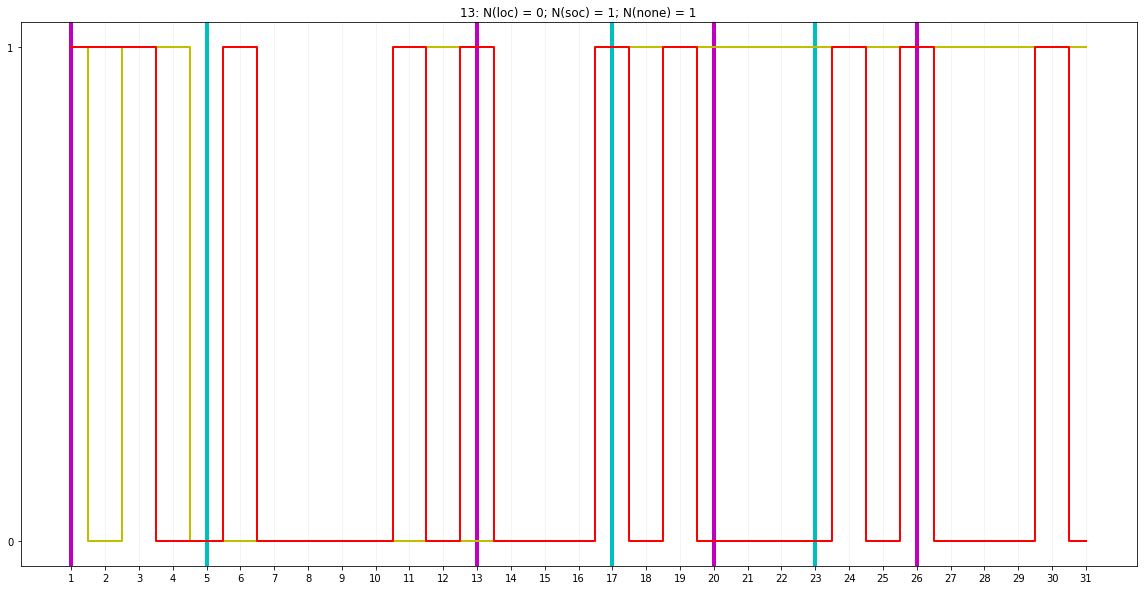

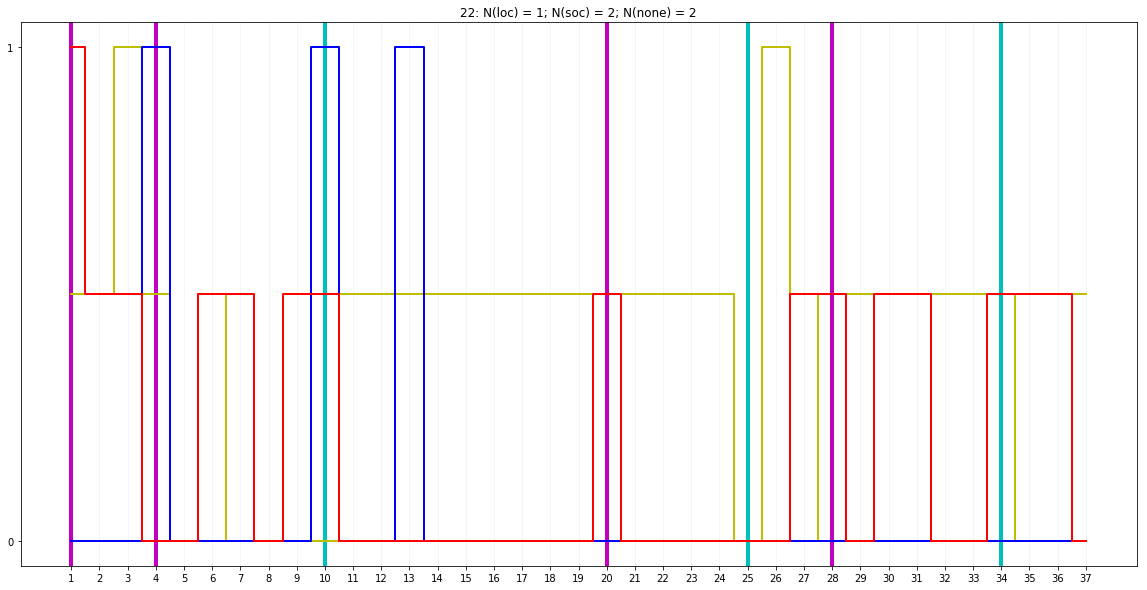

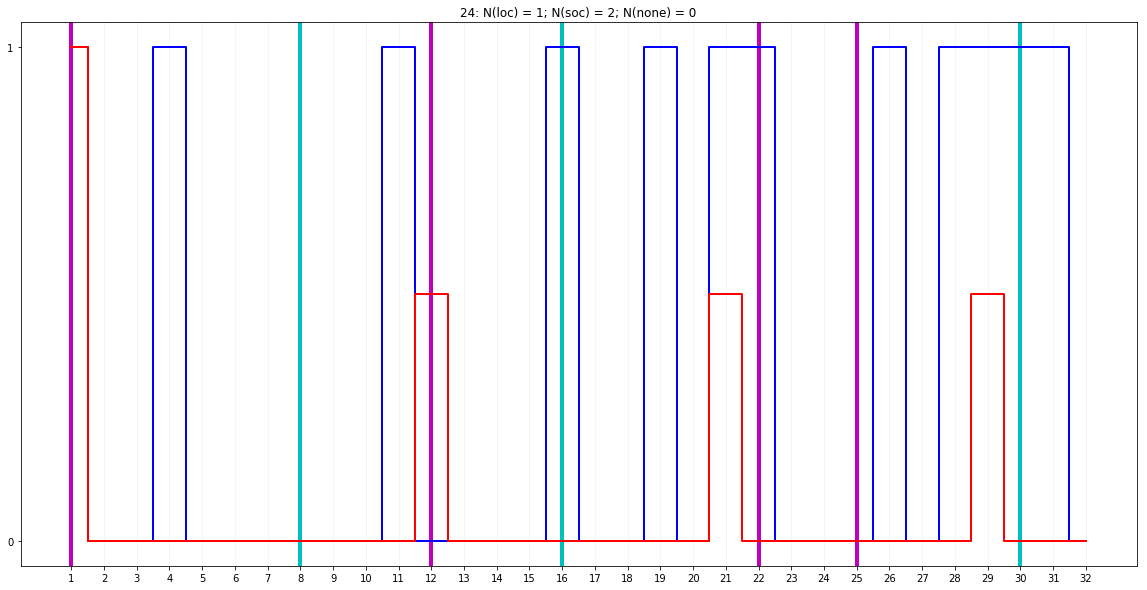

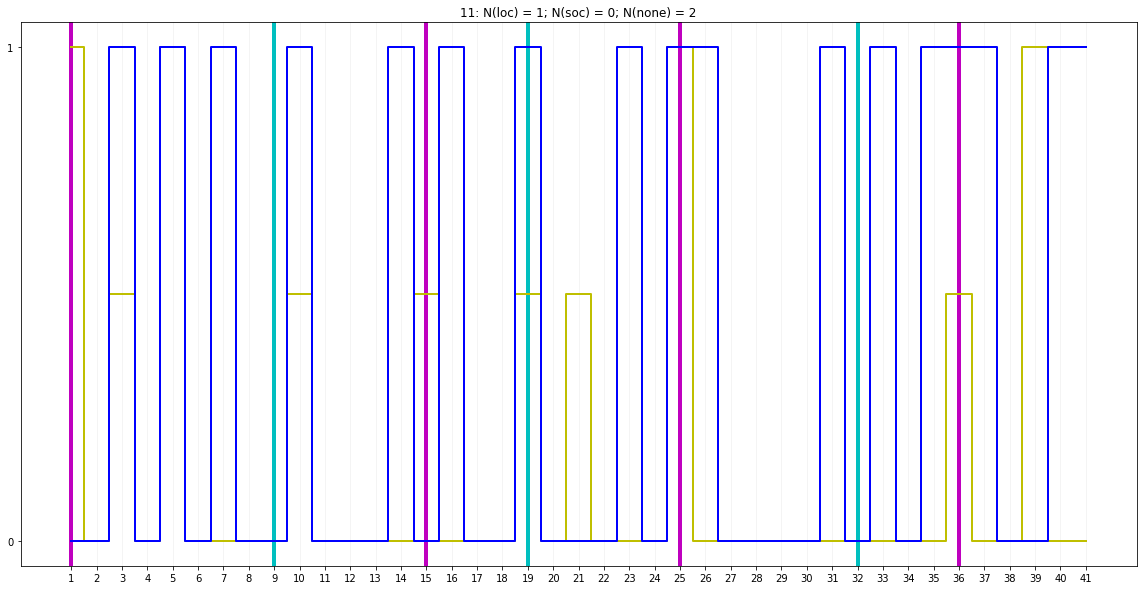

In [44]:
p_bounds = 1

color = ['y', 'b', 'r']
distinct_keys = [none_keys_s, loc_keys_s, soc_keys_s]

for key in all_keys:
    plt.figure(figsize=(20,10))
    #x coords
    x = np.arange(1, (len(all_keys_s[key]) + 1))
    #tick marks
    yint = range(0, 2)
    plt.yticks(yint)
    plt.xticks(x)
    #including p_bounds
    if p_bounds == 1:
        #add location boundaries
        loc_b = story_boundaries[key][:, 0]
        for i in range(0, len(loc_b)):
            if loc_b[i] == 1:
                plt.axvline(x = (i + 1), linewidth=4, color='c')
            else:
                pass
        #add social boundaries
        soc_b = story_boundaries[key][:, 1]
        for i in range(0, len(soc_b)):
            if soc_b[i] == 1:
                plt.axvline(x = (i + 1), linewidth=4, color='m')
            else:
                pass
    else:
        pass
    #iterating through all the dictionaries
    for i in range(3):
        if key in distinct_keys[i]:
            y = distinct_keys[i][key][:,1]
            plt.step(x, y, linewidth=2.0, where = 'mid', color = color[i])
        else:
            pass
    plt.grid(axis='x', color='0.95')
    title = str(key) + ': N(loc) = ' + str(sums[key][1]) + '; N(soc) = ' + str(sums[key][2]) + '; N(none) = ' + str(sums[key][3]) 
    plt.title(title)
    plt.show()